# Estudos de casos? Sistema de recomendação de Músicas, Filmes, Textos e Jogos de tabuleiro

In [22]:
# bibliotecas
## models
from surprise import SVD, KNNBasic
## data
from surprise import Dataset
## reader
from surprise import Reader
## model validation
from surprise.model_selection import cross_validate
## data structure
import pandas as pd
import numpy as np

Um pouco mais sobre SVD:
- https://towardsdatascience.com/recommender-system-singular-value-decomposition-svd-truncated-svd-97096338f361

## Exemplo 1: SVD Movie rating fake data

In [4]:
# prepocess data
df = pd.DataFrame({
    "userID": [1,2,3,4,1,2,3,4],
    "itemID":  ["Star wars", "Harry Potter", "Star wars", "Star wars", "Harry Potter", "Tomb raider", "Harry Potter", "Tomb raider"],
    "rating": [1,3,4,2,3,4,1,1]
})
reader = Reader(rating_scale=(0,4))
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
df

,userID,itemID,rating
0,1,Star wars,1
1,2,Harry Potter,3
2,3,Star wars,4
3,4,Star wars,2
4,1,Harry Potter,3
5,2,Tomb raider,4
6,3,Harry Potter,1
7,4,Tomb raider,1


In [5]:
 pd.pivot_table(df, 
    values=['rating'], 
    index=['userID'],
    columns=['itemID'], 
    aggfunc=np.mean)

rating                      
itemID Harry Potter Star wars Tomb raider
userID                                   
1               3.0       1.0         NaN
2               3.0       NaN         4.0
3               1.0       4.0         NaN
4               NaN       2.0         1.0

In [6]:
# model
algo = SVD()
# evaluate
results = pd.DataFrame(cross_validate(algo, data, measures=["MAE", "RMSE"], cv=5, verbose=False))
results.describe()

,test_mae,test_rmse,fit_time,test_time
count,5.000000,5.000000,5.0,5.0
mean,1.547282,1.582864,0.0,0.0
std,0.509647,0.487411,0.0,0.0
min,0.943230,0.944966,0.0,0.0
25%,1.137630,1.295783,0.0,0.0
50%,1.684395,1.684395,0.0,0.0
75%,1.758358,1.758358,0.0,0.0
max,2.212799,2.230816,0.0,0.0


## Exemplo 2: SVD Album rating fake data

In [7]:
users = {"Angelica": {"Blues Traveler": 3.5, "Broken Bells": 2.0, "Norah Jones": 4.5, "Phoenix": 5.0, "Slightly Stoopid": 1.5, "The Strokes": 2.5, "Vampire Weekend": 2.0},
         "Bill":{"Blues Traveler": 2.0, "Broken Bells": 3.5, "Deadmau5": 4.0, "Phoenix": 2.0, "Slightly Stoopid": 3.5, "Vampire Weekend": 3.0},
         "Chan": {"Blues Traveler": 5.0, "Broken Bells": 1.0, "Deadmau5": 1.0, "Norah Jones": 3.0, "Phoenix": 5, "Slightly Stoopid": 1.0},
         "Dan": {"Blues Traveler": 3.0, "Broken Bells": 4.0, "Deadmau5": 4.5, "Phoenix": 3.0, "Slightly Stoopid": 4.5, "The Strokes": 4.0, "Vampire Weekend": 2.0},
         "Hailey": {"Broken Bells": 4.0, "Deadmau5": 1.0, "Norah Jones": 4.0, "The Strokes": 4.0, "Vampire Weekend": 1.0},
         "Jordyn":  {"Broken Bells": 4.5, "Deadmau5": 4.0, "Norah Jones": 5.0, "Phoenix": 5.0, "Slightly Stoopid": 4.5, "The Strokes": 4.0, "Vampire Weekend": 4.0},
         "Sam": {"Blues Traveler": 5.0, "Broken Bells": 2.0, "Norah Jones": 3.0, "Phoenix": 5.0, "Slightly Stoopid": 4.0, "The Strokes": 5.0},
         "Veronica": {"Blues Traveler": 3.0, "Norah Jones": 5.0, "Phoenix": 4.0, "Slightly Stoopid": 2.5, "The Strokes": 3.0}
}
musics = set()
for user_key in users:
    for music_key in users[user_key]:
        musics.add(music_key)
musics = list(musics)
matrix = []
for user_key in users:
    row = []
    for music in musics:
        if music in users[user_key]:
            row.append(users[user_key][music])
        else:
            row.append(np.nan)
    matrix.append(row)
df = pd.DataFrame(matrix, columns=musics)
df['User'] = users.keys()
df.set_index('User', inplace=True)
df

,Slightly Stoopid,The Strokes,Norah Jones,Blues Traveler,Phoenix,Vampire Weekend,Deadmau5,Broken Bells
User,,,,,,,,
Angelica,1.5,2.5,4.5,3.5,5.0,2.0,NaN,2.0
Bill,3.5,NaN,NaN,2.0,2.0,3.0,4.0,3.5
Chan,1.0,NaN,3.0,5.0,5.0,NaN,1.0,1.0
Dan,4.5,4.0,NaN,3.0,3.0,2.0,4.5,4.0
Hailey,NaN,4.0,4.0,NaN,NaN,1.0,1.0,4.0
Jordyn,4.5,4.0,5.0,NaN,5.0,4.0,4.0,4.5
Sam,4.0,5.0,3.0,5.0,5.0,NaN,NaN,2.0
Veronica,2.5,3.0,5.0,3.0,4.0,NaN,NaN,NaN


In [11]:
users_df = []
albums_df = []
ratings_df = []
for user in users:
    for album in users[user]:
        users_df.append(user)
        albums_df.append(album)
        ratings_df.append(users[user][album])
df = pd.DataFrame({'users': users_df, 'albums': albums_df, 'ratings': ratings_df})
df.head(8)

,users,albums,ratings
0,Angelica,Blues Traveler,3.5
1,Angelica,Broken Bells,2.0
2,Angelica,Norah Jones,4.5
3,Angelica,Phoenix,5.0
4,Angelica,Slightly Stoopid,1.5
5,Angelica,The Strokes,2.5
6,Angelica,Vampire Weekend,2.0
7,Bill,Blues Traveler,2.0


In [12]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df[['users', 'albums', 'ratings']], reader)
algo = SVD()
results = pd.DataFrame(cross_validate(algo, data, measures=["MAE", "RMSE"], cv=5, verbose=False))
results.describe()

,test_mae,test_rmse,fit_time,test_time
count,5.000000,5.000000,5.000000,5.0
mean,1.070946,1.212174,0.000599,0.0
std,0.132926,0.160514,0.000547,0.0
min,0.893955,0.977407,0.000000,0.0
25%,1.024268,1.144709,0.000000,0.0
50%,1.050442,1.220038,0.000998,0.0
75%,1.134117,1.357977,0.000998,0.0
max,1.251946,1.360739,0.001001,0.0


In [13]:
user = "Angelica" # is like chan
item = "Deadmau5"
algo.predict(user, item)

Prediction(uid='Angelica', iid='Deadmau5', r_ui=None, est=2.8478628164619413, details={'was_impossible': False})

## Exemplo 2: KNN Album rating fake data

$$\hat{r}_{ui} = \frac{\sum\limits_{v \in N^k_i(u)} \text{sim}(u, v) \cdot r_{vi}}{\sum\limits_{v \in N^k_i(u)} \text{sim}(u, v)}$$)}

In [20]:
algo = KNNBasic(k=2, min_k=3, verbose=False)
results = pd.DataFrame(cross_validate(algo, data, measures=["MAE", "RMSE"], cv=5, verbose=False))
results.describe()

,test_mae,test_rmse,fit_time,test_time
count,5.000000,5.000000,5.0,5.0
mean,1.117714,1.285992,0.0,0.0
std,0.259984,0.229214,0.0,0.0
min,0.882051,1.032063,0.0,0.0
25%,0.947436,1.167744,0.0,0.0
50%,1.084722,1.268123,0.0,0.0
75%,1.126923,1.314720,0.0,0.0
max,1.547436,1.647309,0.0,0.0


In [21]:
user = "Angelica" # is like chan
item = "Deadmau5"
algo.predict(user, item)

Prediction(uid='Angelica', iid='Deadmau5', r_ui=None, est=3.4125, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

## Exemplo 3: SVD Movie rating MI-100K

- https://predictivehacks.com/topic-modelling-with-nmf-in-python/

In [31]:
data = Dataset.load_builtin('ml-100k')

In [15]:
# model
algo = SVD()
# algo.n_epochs = 40 # (default 20)
# evaluate
results = pd.DataFrame(cross_validate(algo, data, measures=["MAE", "RMSE"], cv=5, verbose=False))
results.describe()

,test_mae,test_rmse,fit_time,test_time
count,5.000000,5.000000,5.0,5.0
mean,1.144393,1.373822,0.0,0.0
std,0.185332,0.159431,0.0,0.0
min,0.977544,1.161830,0.0,0.0
25%,1.062558,1.349591,0.0,0.0
50%,1.065404,1.353101,0.0,0.0
75%,1.161718,1.395744,0.0,0.0
max,1.454742,1.608844,0.0,0.0


## Exemplo 4: NMF Topic extraction to News recommendation

- https://predictivehacks.com/topic-modelling-with-nmf-in-python/
- https://www.kaggle.com/datasets/keitazoumana/abcnewsdata

In [39]:
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
 
documents = pd.read_csv('../datasets/news-data.csv', on_bad_lines='skip')
documents.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [40]:
vect = TfidfVectorizer(min_df=50, stop_words='english')
X = vect.fit_transform(documents.headline_text)

In [41]:
model = NMF(n_components=10, random_state=5)
model.fit(X)
nmf_features = model.transform(X)

In [42]:
# [TFIDF] = [FEATURES] * [COMPONENTS]
X.shape, nmf_features.shape, model.components_.shape

((1103663, 11213), (1103663, 10), (10, 11213))

In [43]:
components_df = pd.DataFrame(model.components_, columns=vect.get_feature_names_out())

In [44]:
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
man         8.475909
charged     3.146610
murder      1.380229
jailed      0.900210
missing     0.889191
stabbing    0.734083
guilty      0.643090
arrested    0.605810
death       0.592959
sydney      0.537525
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
interview    7.472075
extended     0.393124
michael      0.383897
david        0.226689
john         0.222385
james        0.211183
nrl          0.202300
smith        0.179725
ben          0.172398
andrew       0.169564
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
police         6.896466
probe          0.816062
investigate    0.796457
missing        0.680675
search         0.638359
death          0.498263
hunt           0.420739
officer        0.330249
seek           0.313632
shooting       0.301289
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
new         8.544864
zealand     0.578448
laws      

In [45]:
my_document = documents.headline_text[55]

In [46]:
pd.DataFrame(nmf_features).loc[55]

0    0.000000
1    0.000000
2    0.001269
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.011678
Name: 55, dtype: float64

In [47]:
pd.DataFrame(nmf_features).loc[55].idxmax()

9

In [48]:
# número de documentos em cada tópico
pd.DataFrame(nmf_features).idxmax(axis=1).value_counts()

9    766571
6     57694
2     55340
7     47128
0     41684
8     39547
3     30459
1     23802
5     21555
4     19883
dtype: int64

In [49]:
my_news = """15-year-old girl stabbed to death in grocery store during fight with 4 younger girls
Authorities said they gathered lots of evidence from videos on social media"""
 
# Transform the TF-IDF
X = vect.transform([my_news])
# Transform the TF-IDF: nmf_features
nmf_features = model.transform(X)
 
pd.DataFrame(nmf_features)

,0,1,2,3,4,5,6,7,8,9
0,0.002323,0.000042,0.002351,0.001409,0.000031,0.000179,0.000599,0.001375,0.000889,0.00417


In [50]:
import sys
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in list(
                          locals().items())), key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                     documents: 110.7 MiB
                           tmp:  1.0 MiB
                 components_df: 876.2 KiB
                            df:  6.8 KiB
                            _8:  6.8 KiB
                           SVD:  2.0 KiB
               TfidfVectorizer:  2.0 KiB
                           _i1:  1.6 KiB
                           _i7:  1.6 KiB
                      KNNBasic:  1.4 KiB


In [51]:
del documents

## Exemplo 6: Recomendação para RH

In [124]:
import glob
# setembro 2022
lattes_uftm = glob.glob('C:\\Users\\leandro\\Downloads\\cd2023\\cd2023\\datasets\\lattes_uftm\\*\\*\\*.zip')
for lattes in lattes_uftm[:5]:
    print(lattes)

C:\Users\leandro\Downloads\cd2023\cd2023\datasets\lattes_uftm\CAMUNIT\CURSO DE AGRONOMIA\0305182367819722.zip
C:\Users\leandro\Downloads\cd2023\cd2023\datasets\lattes_uftm\CAMUNIT\CURSO DE AGRONOMIA\0616781392067509.zip
C:\Users\leandro\Downloads\cd2023\cd2023\datasets\lattes_uftm\CAMUNIT\CURSO DE AGRONOMIA\1108308073611436.zip
C:\Users\leandro\Downloads\cd2023\cd2023\datasets\lattes_uftm\CAMUNIT\CURSO DE AGRONOMIA\2533558988795199.zip
C:\Users\leandro\Downloads\cd2023\cd2023\datasets\lattes_uftm\CAMUNIT\CURSO DE AGRONOMIA\2918135495150412.zip


In [144]:
lattes_ids = []
institutos = []
cursos = []
for lattes in lattes_uftm:
    instituto, curso, lattes_id = lattes.split('\\')[-3:]
    lattes_id = lattes_id.replace('.zip', '')
    lattes_ids.append(lattes_id)
    institutos.append(instituto)
    cursos.append(curso)

idsdf = pd.DataFrame({
    "lattes_ids": lattes_ids,
    "instituto": institutos,
    "curso": cursos
})

In [127]:
import zipfile
import shutil

destination = "C:\\Users\\leandro\\Downloads\\cd2023\\cd2023\\datasets\\unzipeds"

for lattes in lattes_uftm:
    final_name = lattes.split('\\')[-1]
    shutil.copy(lattes, destination + "\\" + final_name)

In [128]:
zip_files = glob.glob("C:\\Users\\leandro\\Downloads\\cd2023\\cd2023\\datasets\\unzipeds\\*.zip")
import os
for zip_file in zip_files:
    final_name = zip_file.split('\\')[-1].replace('.zip','')
    zip_ref = zipfile.ZipFile(zip_file)  
    zip_ref.extractall(f"C:\\Users\\leandro\\Downloads\\cd2023\\cd2023\\datasets\\unzipeds\\")  
    zip_ref.close()
    os.rename(
        f"C:\\Users\\leandro\\Downloads\\cd2023\\cd2023\\datasets\\unzipeds\\curriculo.xml",
        f"C:\\Users\\leandro\\Downloads\\cd2023\\cd2023\\datasets\\unzipeds\\{final_name}.xml"
    )

In [179]:
from lxml import etree

xml_lattes = glob.glob("C:\\Users\\leandro\\Downloads\\cd2023\\cd2023\\datasets\\unzipeds\\*.xml")

codigo_area_dict = {
    "10000003": "Ciências Exatas e da Terra",
    "10100008": "Matemática",
    "10101004": "Álgebra",
    "10101012": "Conjuntos",
    "10101020": "Lógica Matemática",
    "10101039": "Teoria dos Números",
    "10101047": "Grupos de Algebra Não-Comutaviva",
    "10101055": "Algebra Comutativa",
    "10101063": "Geometria Algebrica",
    "10102000": "Análise",
    "10102019": "Análise Complexa",
    "10102027": "Análise Funcional",
    "10102035": "Análise Funcional Não-Linear",
    "10102043": "Equações Diferênciais Ordinárias",
    "10102051": "Equações Diferênciais Parciais",
    "10102060": "Equações Diferênciais Funcionais",
    "10103007": "Geometria e Topologia",
    "10103015": "Geometria Diferêncial",
    "10103023": "Topologia Algébrica",
    "10103031": "Topologia das Variedades",
    "10103040": "Sistemas Dinâmicos",
    "10103058": "Teoria das Singularidades e Teoria das Catástrofes",
    "10103066": "Teoria das Folheações",
    "10104003": "Matemática Aplicada",
    "10104011": "Física Matemática",
    "10104020": "Análise Numérica",
    "10104038": "Matemática Discreta e Combinatoria",
    "10200002": "Probabilidade e Estatística",
    "10201009": "Probabilidade",
    "10201017": "Teoria Geral e Fundamentos da Probabilidade",
    "10201025": "Teoria Geral e Processos Estocásticos",
    "10201033": "Teoremas de Limite",
    "10201041": "Processos Markovianos",
    "10201050": "Análise Estocástica",
    "10201068": "Processos Estocásticos Especiais",
    "10202005": "Estatística",
    "10202013": "Fundamentos da Estatística",
    "10202021": "Inferência Paramétrica",
    "10202030": "Inferência Nao-Paramétrica",
    "10202048": "Inferência em Processos Estocásticos",
    "10202056": "Análise Multivariada",
    "10202064": "Regressão e Correlação",
    "10202072": "Planejamento de Experimentos",
    "10202080": "Análise de Dados",
    "10203001": "Probabilidade e Estatística Aplicadas",
    "10300007": "Ciência da Computação",
    "10301003": "Teoria da Computação",
    "10301011": "Computabilidade e Modelos de Computação",
    "10301020": "Linguagem Formais e Automatos",
    "10301038": "Análise de Algoritmos e Complexidade de Computação",
    "10301046": "Lógicas e Semântica de Programas",
    "10302000": "Matemática da Computação",
    "10302018": "Matemática Simbólica",
    "10302026": "Modelos Analíticos e de Simulação",
    "10303006": "Metodologia e Técnicas da Computação",
    "10303014": "Linguagens de Programação",
    "10303022": "Engenharia de Software",
    "10303030": "Banco de Dados",
    "10303049": "Sistemas de Informação",
    "10303057": "Processamento Gráfico (Graphics)",
    "10304002": "Sistemas de Computação",
    "10304010": "Hardware",
    "10304029": "Arquitetura de Sistemas de Computação",
    "10304037": "Software Básico",
    "10304045": "Teleinformática",
    "10400001": "Astronomia",
    "10401008": "Astronomia de Posição e Mecânica Celeste",
    "10401016": "Astronomia Fundamental",
    "10401024": "Astronomia Dinâmica",
    "10402004": "Astrofísica Estelar",
    "10403000": "Astrofísica do Meio Interestelar",
    "10403019": "Meio Interestelar",
    "10403027": "Nebulosa",
    "10404007": "Astrofísica Extragaláctica",
    "10404015": "Galáxias",
    "10404023": "Aglomerados de Galáxias",
    "10404031": "Quasares",
    "10404040": "Cosmologia",
    "10405003": "Astrofísica do Sistema Solar",
    "10405011": "Física Solar",
    "10405020": "Movimento da Terra",
    "10405038": "Sistema Planetário",
    "10406000": "Instrumentação Astronômica",
    "10406018": "Astronômia Ótica",
    "10406026": "Radioastronomia",
    "10406034": "Astronomia Espacial",
    "10406042": "Processamento de Dados Astronômicos",
    "10500006": "Física",
    "10501002": "Física Geral",
    "10501010": "Métodos Matemáticos da Física",
    "10501029": "Física Clássica e Física Quântica; Mecânica e Campos",
    "10501037": "Relatividade e Gravitação",
    "10501045": "Física Estatística e Termodinâmica",
    "10501053": "Metrologia, Técnicas Gerais de Laboratório, Sistema de Instrumentação",
    "10501061": "Instrumentação Específica de Uso Geral em Física",
    "10502009": "Áreas Clássicas de Fenomenologia e suas Aplicações",
    "10502017": "Eletricidade e Magnetismo; Campos e Partículas Carregadas",
    "10502025": "Ótica",
    "10502033": "Acústica",
    "10502041": "Transferência de Calor; Processos Térmicos e Termodinâmicos",
    "10502050": "Mecânica, Elasticidade e Reologia",
    "10502068": "Dinâmica dos Fluidos",
    "10503005": "Física das Partículas Elementares e Campos",
    "10503013": "Teoria Geral de Partículas e Campos",
    "10503021": "Teorias Específicas e Modelos de Interação; Sistematica de Partículas; Raios Cósmicos",
    "10503030": "Reações Específicas e Fenomiologia de Partículas",
    "10503048": "Propriedades de Partículas Específicas e Ressonâncias",
    "10504001": "Física Nuclear",
    "10504010": "Estrutura Nuclear",
    "10504028": "Desintegração Nuclear e Radioatividade",
    "10504036": "Reações Nucleares e Espalhamento Geral",
    "10504044": "Reações Nucleares e Espalhamento (Reações Específicas)",
    "10504052": "Propriedades de Núcleos Específicos",
    "10504060": "Métodos Experimentais e Instrumentação para Partículas Elementares e Física Nuclear",
    "10505008": "Física Atômica e Molécular",
    "10505016": "Estrutura Eletrônica de Átomos e Moléculas; Teoria",
    "10505024": "Espectros Atômicos e Integração de Fótons",
    "10505032": "Espectros Moléculares e Interações de Fótons com Moléculas",
    "10505040": "Processos de Colisão e Interações de Átomos e Moléculas",
    "10505059": "Inf.Sobre Átomos e Moléculas Obtidos Experimentalmente;Instrumentação e Técnicas",
    "10505067": "Estudos de Átomos e Moléculas Especiais",
    "10506004": "Física dos Fluidos, Física de Plasmas e Descargas Elétricas",
    "10506012": "Cinética e Teoria de Transporte de Fluidos; Propriedades Físicas de Gases",
    "10506020": "Física de Plasmas e Descargas Elétricas",
    "10507000": "Física da Matéria Condensada",
    "10507019": "Estrutura de Líquidos e Sólidos; Cristalografia",
    "10507027": "Propriedades Mecânicas e Acústicas da Matéria Condensada",
    "10507035": "Dinâmica da Rede e Estatística de Cristais",
    "10507043": "Equação de Estado, Equilíbrio de Fases e Transições de Fase",
    "10507051": "Propriedades Térmicas da Matéria Condensada",
    "10507060": "Propriedades de Transportes de Matéria Condensada (Não Eletrônicas)",
    "10507078": "Campos Quânticos e Sólidos, Hélio, Líquido, Sólido",
    "10507086": "Superfícies e Interfaces; Películas e Filamentos",
    "10507094": "Estados Eletrônicos",
    "10507108": "Transp.Eletrônicos e Prop. Elétricas de Superfícies; Interfaces e Películas",
    "10507116": "Estruturas Eletrônicas e Propriedades Elétricas de Superfícies Interfaces e Películas",
    "10507124": "Superconduitividade",
    "10507132": "Materiais Magnéticos e Propriedades Magnéticas",
    "10507140": "Ressonância Mag.e Relax.Na Mat.Condens;Efeitos Mosbauer;Corr.Ang.Pertubada",
    "10507159": "Materiais Dielétricos e Propriedades Dielétricas",
    "10507167": "Prop.Óticas e Espectrosc.da Mat.Condens;Outras Inter.da Mat.Com Rad.e Part.",
    "10507175": "Emissão Eletrônica e Iônica por Líquidos e Sólidos; Fenômenos de Impacto",
    "10600000": "Química",
    "10601007": "Química Orgânica",
    "10601015": "Estrutura, Conformação e Estereoquímica",
    "10601023": "Sintese Orgânica",
    "10601031": "Fisico-Química Orgânica",
    "10601040": "Fotoquímica Orgânica",
    "10601058": "Química dos Produtos Naturais",
    "10601066": "Evolução, Sistemática e Ecologia Química",
    "10601074": "Polimeros e Colóides",
    "10602003": "Química Inorgânica",
    "10602011": "Campos de Coordenação",
    "10602020": "Não-Metais e Seus Compostos",
    "10602038": "Compostos Organo-Metálicos",
    "10602046": "Determinação de Estrutura de Compostos Inorgânicos",
    "10602054": "Foto-Química Inorgânica",
    "10602062": "Fisico Química Inorgânica",
    "10602070": "Química Bio-Inorgânica",
    "10603000": "Fisico-Química",
    "10603018": "Cinética Química e Catálise",
    "10603026": "Eletroquímica",
    "10603034": "Espectroscopia",
    "10603042": "Química de Interfaces",
    "10603050": "Química do Estado Condensado",
    "10603069": "Química Nuclear e Radioquímica",
    "10603077": "Química Teórica",
    "10603085": "Termodinâmica Química",
    "10604006": "Química Analítica",
    "10604014": "Separação",
    "10604022": "Métodos Óticos de Análise",
    "10604030": "Eletroanalítica",
    "10604049": "Gravimetria",
    "10604057": "Titimetria",
    "10604065": "Instrumentação Analítica",
    "10604073": "Análise de Traços e Química Ambiental",
    "10700005": "GeoCiências",
    "10701001": "Geologia",
    "10701010": "Mineralogia",
    "10701028": "Petrologia",
    "10701036": "Geoquímica",
    "10701044": "Geologia Regional",
    "10701052": "Geotectônica",
    "10701060": "Geocronologia",
    "10701079": "Cartografia Geológica",
    "10701087": "Metalogenia",
    "10701095": "Hidrogeologia",
    "10701109": "Prospecção Mineral",
    "10701117": "Sedimentologia",
    "10701125": "Paleontologia Estratigráfica",
    "10701133": "Estratigrafia",
    "10701141": "Geologia Ambiental",
    "10702008": "Geofísica",
    "10702016": "Geomagnetismo",
    "10702024": "Sismologia",
    "10702032": "Geotermia e Fluxo Térmico",
    "10702040": "Propriedades Físicas das Rochas",
    "10702059": "Geofísica Nuclear",
    "10702067": "Sensoriamento Remoto",
    "10702075": "Aeronomia",
    "10702083": "Desenvolvimento de Instrumentação Geofísica",
    "10702091": "Geofísica Aplicada",
    "10702105": "Gravimetria",
    "10703004": "Meteorologia",
    "10703012": "Meteorologia Dinâmica",
    "10703020": "Meteorologia Sinótica",
    "10703039": "Meteorologia Física",
    "10703047": "Química da Atmosfera",
    "10703055": "Instrumentação Meteorológica",
    "10703063": "Climatologia",
    "10703071": "Micrometeorologia",
    "10703080": "Sensoriamento Remoto da Atmosfera",
    "10703098": "Meteorologia Aplicada",
    "10704000": "Geodesia",
    "10704019": "Geodesia Física",
    "10704027": "Geodesia Geométrica",
    "10704035": "Geodesia Celeste",
    "10704043": "Fotogrametria",
    "10704051": "Cartografia Básica",
    "10705007": "Geografia Física",
    "10705015": "Geomorfologia",
    "10705023": "Climatologia Geográfica",
    "10705031": "Pedologia",
    "10705040": "Hidrogeografia",
    "10705058": "Geoecologia",
    "10705066": "Fotogeografia (Físico-Ecológica)",
    "10705074": "Geocartografia",
    "10800000": "Oceanografia",
    "10801006": "Oceanografia Biológica",
    "10801014": "Interação entre os Organismos Marinhos e os Parâmetros Ambientais",
    "10802002": "Oceanografia Física",
    "10802010": "Variáveis Físicas da Água do Mar",
    "10802029": "Movimento da Água do Mar",
    "10802037": "Origem das Massas de Água",
    "10802045": "Interação do Oceano com o Leito do Mar",
    "10802053": "Interação do Oceano com a Atmosfera",
    "10803009": "Oceanografia Química",
    "10803017": "Propriedades Químicas da Água do Mar",
    "10803025": "Interações Químico-Biológicas/Geológicas das Substâncias Químicas da Água do Mar",
    "10804005": "Oceanografia Geológica",
    "10804013": "Geomorfologia Submarina",
    "10804021": "Sedimentologia Marinha",
    "10804030": "Geofísica Marinha",
    "20000006": "Ciências Biológicas",
    "20100000": "Biologia Geral",
    "20200005": "Genética",
    "20201001": "Genética Quantitativa",
    "20202008": "Genética Molecular e de Microorganismos",
    "20203004": "Genética Vegetal",
    "20204000": "Genética Animal",
    "20205007": "Genética Humana e Médica",
    "20206003": "Mutagênese",
    "20300000": "Botânica",
    "20301006": "Paleobotânica",
    "20302002": "Morfologia Vegetal",
    "20302010": "Morfologia Externa",
    "20302029": "Citologia Vegetal",
    "20302037": "Anatomia Vegetal",
    "20302045": "Palinologia",
    "20303009": "Fisiologia Vegetal",
    "20303017": "Nutrição e Crescimento Vegetal",
    "20303025": "Reprodução Vegetal",
    "20303033": "Ecofisiologia Vegetal",
    "20304005": "Taxonomia Vegetal",
    "20304013": "Taxonomia de Criptógamos",
    "20304021": "Taxonomia de Fanerógamos",
    "20305001": "Fitogeografia",
    "20306008": "Botânica Aplicada",
    "20400004": "Zoologia",
    "20401000": "Paleozoologia",
    "20402007": "Morfologia dos Grupos Recentes",
    "20403003": "Fisiologia dos Grupos Recentes",
    "20404000": "Comportamento Animal",
    "20405006": "Taxonomia dos Grupos Recentes",
    "20406002": "Zoologia Aplicada",
    "20406010": "Conservação das Espécies Animais",
    "20406029": "Utilização dos Animais",
    "20406037": "Controle Populacional de Animais",
    "20500009": "Ecologia",
    "20501005": "Ecologia Teórica",
    "20502001": "Ecologia de Ecossistemas",
    "20503008": "Ecologia Aplicada",
    "20600003": "Morfologia",
    "20601000": "Citologia e Biologia Celular",
    "20602006": "Embriologia",
    "20603002": "Histologia",
    "20604009": "Anatomia",
    "20604017": "Anatomia Humana",
    "20700008": "Fisiologia",
    "20701004": "Fisiologia Geral",
    "20702000": "Fisiologia de Órgaos e Sistemas",
    "20702019": "Neurofisiologia",
    "20702027": "Fisiologia Cardiovascular",
    "20702035": "Fisiologia da Respiração",
    "20702043": "Fisiologia Renal",
    "20702051": "Fisiologia Endocrina",
    "20702060": "Fisiologia da Digestão",
    "20702078": "Cinesiologia",
    "20703007": "Fisiologia do Esforço",
    "20704003": "Fisiologia Comparada",
    "20800002": "Bioquímica",
    "20801009": "Química de Macromoléculas",
    "20801017": "Proteínas",
    "20801025": "Lipídeos",
    "20801033": "Glicídeos",
    "20802005": "Bioquímica dos Microorganismos",
    "20803001": "Metabolismo e Bioenergética",
    "20804008": "Biologia Molecular",
    "20805004": "Enzimologia",
    "20900007": "Biofísica",
    "20901003": "Biofísica Molecular",
    "20902000": "Biofísica Celular",
    "20903006": "Biofísica de Processos e Sistemas",
    "20904002": "Radiologia e Fotobiologia",
    "21000000": "Farmacologia",
    "21001006": "Farmacologia Geral",
    "21001014": "Farmacocinética",
    "21001022": "Biodisponibilidade",
    "21002002": "Farmacologia Autonômica",
    "21003009": "Neuropsicofarmacologia",
    "21004005": "Farmacologia Cardiorenal",
    "21005001": "Farmacologia Bioquímica e Molecular",
    "21006008": "Etnofarmacologia",
    "21007004": "Toxicologia",
    "21008000": "Farmacologia Clínica",
    "21100004": "Imunologia",
    "21101000": "Imunoquímica",
    "21102007": "Imunologia Celular",
    "21103003": "Imunogenética",
    "21104000": "Imunologia Aplicada",
    "21200009": "Microbiologia",
    "21201005": "Biologia e Fisiologia dos Microorganismos",
    "21201013": "Virologia",
    "21201021": "Bacterologia",
    "21201030": "Micologia",
    "21202001": "Microbiologia Aplicada",
    "21202010": "Microbiologia Médica",
    "21202028": "Microbiologia Industrial e de Fermentação",
    "21300003": "Parasitologia",
    "21301000": "Protozoologia de Parasitos",
    "21301018": "Protozoologia Parasitária Humana",
    "21301026": "Protozoologia Parasitária Animal",
    "21302006": "Helmintologia de Parasitos",
    "21302014": "Helmintologia Humana",
    "21302022": "Helmintologia Animal",
    "21303002": "Entomologia e Malacologia de Parasitos e Vetores",
    "30000009": "Engenharias",
    "30100003": "Engenharia Civil",
    "30101000": "Construção Civil",
    "30101018": "Materiais e Componentes de Construção",
    "30101026": "Processos Construtivos",
    "30101034": "Instalações Prediais",
    "30102006": "Estruturas",
    "30102014": "Estruturas de Concreto",
    "30102022": "Estruturas de Madeiras",
    "30102030": "Estruturas Metálicas",
    "30102049": "Mecânica das Estruturas",
    "30103002": "Geotécnica",
    "30103010": "Fundações e Escavações",
    "30103029": "Mecânicas das Rochas",
    "30103037": "Mecânicas dos Solos",
    "30103045": "Obras de Terra e Enrocamento",
    "30103053": "Pavimentos",
    "30104009": "Engenharia Hidráulica",
    "30104017": "Hidráulica",
    "30104025": "Hidrologia",
    "30105005": "Infra-Estrutura de Transportes",
    "30105013": "Aeroportos; Projeto e Construção",
    "30105021": "Ferrovias; Projetos e Construção",
    "30105030": "Portos e Vias Nevegáveis; Projeto e Construção",
    "30105048": "Rodovias; Projeto e Construção",
    "30200008": "Engenharia de Minas",
    "30201004": "Pesquisa Mineral",
    "30201012": "Caracterização do Minério",
    "30201020": "Dimensionamento de Jazidas",
    "30202000": "Lavra",
    "30202019": "Lavra a Céu Aberto",
    "30202027": "Lavra de Mina Subterrânea",
    "30202035": "Equipamentos de Lavra",
    "30203007": "Tratamento de Minérios",
    "30203015": "Métodos de Concentração e Enriquecimento de Minérios",
    "30203023": "Equipamentos de Beneficiamento de Minérios",
    "30300002": "Engenharia de Materiais e Metalúrgica",
    "30301009": "Instalações e Equipamentos Metalúrgicos",
    "30301017": "Instalações Metalúrgicas",
    "30301025": "Equipamentos Metalúrgicos",
    "30302005": "Metalurgia Extrativa",
    "30302013": "Aglomeração",
    "30302021": "Eletrometalurgia",
    "30302030": "Hidrometalurgia",
    "30302048": "Pirometalurgia",
    "30302056": "Tratamento de Minérios",
    "30303001": "Metalurgia de Transformação",
    "30303010": "Conformação Mecânica",
    "30303028": "Fundição",
    "30303036": "Metalurgia de Po",
    "30303044": "Recobrimentos",
    "30303052": "Soldagem",
    "30303060": "Tratamento Térmicos, Mecânicos e Químicos",
    "30303079": "Usinagem",
    "30304008": "Metalurgia Fisica",
    "30304016": "Estrutura dos Metais e Ligas",
    "30304024": "Propriedades Físicas dos Metais e Ligas",
    "30304032": "Propriedades Mecânicas dos Metais e Ligas",
    "30304040": "Transformação de Fases",
    "30304059": "Corrosão",
    "30305004": "Materiais não Metálicos",
    "30305012": "Extração e Transformação de Materiais",
    "30305020": "Cerâmicos",
    "30305039": "Materiais Conjugados não Metálicos",
    "30305047": "Polímeros, Aplicações",
    "30400007": "Engenharia Elétrica",
    "30401003": "Materiais Elétricos",
    "30401011": "Materiais Condutores",
    "30401020": "Materiais e Componentes Semicondutores",
    "30401038": "Materiais e Dispositivos Supercondutores",
    "30401046": "Materiais Dielétricos, Piesoelétricos e Ferroelétricos",
    "30401054": "Materiais e Componentes Eletroóticos e Magnetoóticos, Materiais Fotoelétricos",
    "30401062": "Materiais e Dispositivos Magnéticos",
    "30402000": "Medidas Elétricas, Magnéticas e Eletrônicas; Instrumentação",
    "30402018": "Medidas Elétricas",
    "30402026": "Medidas Magnéticas",
    "30402034": "Instrumentação Eletromecânica",
    "30402042": "Instrumentação Eletrônica",
    "30402050": "Sistemas Eletrônicos de Medida e de Controle",
    "30403006": "Circuitos Elétricos, Magnéticos e Eletrônicos",
    "30403014": "Teoria Geral dos Circuitos Elétricos",
    "30403022": "Circuitos Lineares e Não-Lineares",
    "30403030": "Circuitos Eletrônicos",
    "30403049": "Circuitos Magnéticos, Magnetismos, Eletromagnetismo",
    "30404002": "Sistemas Elétricos de Potência",
    "30404010": "Geração da Energia Elétrica",
    "30404029": "Transmissão da Energia Elétrica, Distribuição da Energia Elétrica",
    "30404037": "Conversão e Retificação da Energia Elétrica",
    "30404045": "Medição, Controle, Correção e Proteção de Sistemas Elétricos de Potência",
    "30404053": "Máquinas Elétricas e Dispositivos de Potência",
    "30404061": "Instalações Elétricas Prediais e Industriais",
    "30405009": "Eletrônica Industrial, Sistemas e Controles Eletrônicos",
    "30405017": "Eletrônica Industrial",
    "30405025": "Automação Eletrônica de Processos Elétricos e Industriais",
    "30405033": "Controle de Processos Eletrônicos, Retroalimentação",
    "30406005": "Telecomunicações",
    "30406013": "Teoria Eletromagnética, Microondas, Propagação de Ondas, Antenas",
    "30406021": "Radionavegação e Radioastronomia",
    "30406030": "Sistemas de Telecomunicações",
    "30500001": "Engenharia Mecânica",
    "30501008": "Fenômenos de Transporte",
    "30501016": "Transferência de Calor",
    "30501024": "Mecânica dos Fluidos",
    "30501032": "Dinâmica dos Gases",
    "30501040": "Principios Variacionais e Métodos Numéricos",
    "30502004": "Engenharia Térmica",
    "30502012": "Termodinâmica",
    "30502020": "Controle Ambiental",
    "30502039": "Aproveitamento da Energia",
    "30503000": "Mecânica dos Sólidos",
    "30503019": "Mecânica dos Corpos Sólidos, Elásticos e Plásticos",
    "30503027": "Dinâmica dos Corpos Rígidos, Elásticos e Plásticos",
    "30503035": "Análise de Tensões",
    "30503043": "Termoelasticidade",
    "30504007": "Projetos de Máquinas",
    "30504015": "Teoria dos Mecanismos",
    "30504023": "Estática e Dinâmica Aplicada",
    "30504031": "Elementos de Máquinas",
    "30504040": "Fundamentos Gerais de Projetos das Máquinas",
    "30504058": "Máquinas, Motores e Equipamentos",
    "30504066": "Métodos de Síntese e Otimização Aplicados ao Projeto Mecânico",
    "30504074": "Controle de Sistemas Mecânicos",
    "30504082": "Aproveitamento de Energia",
    "30505003": "Processos de Fabricação",
    "30505011": "Matrizes e Ferramentas",
    "30505020": "Máquinas de Usinagem e Conformação",
    "30505038": "Controle Numérico",
    "30505046": "Robotização",
    "30505054": "Processos de Fabricação, Seleção Econômica",
    "30600006": "Engenharia Química",
    "30601002": "Processos Industriais de Engenharia Química",
    "30601010": "Processos Bioquimicos",
    "30601029": "Processos Orgânicos",
    "30601037": "Processos Inorgânicos",
    "30602009": "Operações Industriais e Equipamentos para Engenharia Química",
    "30602017": "Reatores Químicos",
    "30602025": "Operações Características de Processos Bioquímicos",
    "30602033": "Operações de Separação e Mistura",
    "30603005": "Tecnologia Química",
    "30603013": "Balancos Globais de Matéria e Energia",
    "30603021": "Água",
    "30603030": "Álcool",
    "30603048": "Alimentos",
    "30603056": "Borrachas",
    "30603064": "Carvão",
    "30603072": "Cerâmica",
    "30603080": "Cimento",
    "30603099": "Couro",
    "30603102": "Detergentes",
    "30603110": "Fertilizantes",
    "30603129": "Medicamentos",
    "30603137": "Metais não-Ferrosos",
    "30603145": "Óleos",
    "30603153": "Papel e Celulose",
    "30603161": "Petróleo e Petroquímica",
    "30603170": "Polímeros",
    "30603188": "Produtos Naturais",
    "30603196": "Têxteis",
    "30603200": "Tratamentos e Aproveitamento de Rejeitos",
    "30603218": "Xisto",
    "30700000": "Engenharia Sanitária",
    "30701007": "Recursos Hídricos",
    "30701015": "Planejamento Integrado dos Recursos Hídricos",
    "30701023": "Tecnologia e Problemas Sanitários de Irrigação",
    "30701031": "Águas Subterrâneas e Poços Profundos",
    "30701040": "Controle de Enchentes e de Barragens",
    "30701058": "Sedimentologia",
    "30702003": "Tratamento de Águas de Abastecimento e Residuárias",
    "30702011": "Química Sanitária",
    "30702020": "Processos Simplificados de Tratamento de Águas",
    "30702038": "Técnicas Convencionais de Tratamento de Águas",
    "30702046": "Técnicas Avancadas de Tratamento de Águas",
    "30702054": "Estudos e Caracterização de Efluentes Industriais",
    "30702062": "Lay Out de Processos Industriais",
    "30702070": "Resíduos Radioativos",
    "30703000": "Saneamento Básico",
    "30703018": "Técnicas de Abastecimento da Água",
    "30703026": "Drenagem de Águas Residuárias",
    "30703034": "Drenagem Urbana de Águas Pluviais",
    "30703042": "Resíduos Sólidos, Domésticos e Industriais",
    "30703050": "Limpeza Pública",
    "30703069": "Instalações Hidráulico-Sanitárias",
    "30704006": "Saneamento Ambiental",
    "30704014": "Ecologia Aplicada à Engenharia Sanitária",
    "30704022": "Microbiologia Aplicada e Engenharia Sanitária",
    "30704030": "Parasitologia Aplicada à Engenharia Sanitária",
    "30704049": "Qualidade do Ar, das Águas e do Solo",
    "30704057": "Controle da Poluição",
    "30704065": "Legislação Ambiental",
    "30800005": "Engenharia de Produção",
    "30801001": "Gerência de Produção",
    "30801010": "Planejamento de Instalações Industriais",
    "30801028": "Planejamento, Projeto e Controle de Sistemas de Produção",
    "30801036": "Higiene e Segurança do Trabalho",
    "30801044": "Suprimentos",
    "30801052": "Garantia de Controle de Qualidade",
    "30802008": "Pesquisa Operacional",
    "30802016": "Processos Estocásticos e Teorias da Filas",
    "30802024": "Programação Linear, Não-Linear, Mista e Dinâmica",
    "30802032": "Séries Temporais",
    "30802040": "Teoria dos Grafos",
    "30802059": "Teoria dos Jogos",
    "30803004": "Engenharia do Produto",
    "30803012": "Ergonomia",
    "30803020": "Metodologia de Projeto do Produto",
    "30803039": "Processos de Trabalho",
    "30803047": "Gerência do Projeto e do Produto",
    "30803055": "Desenvolvimento de Produto",
    "30804000": "Engenharia Econômica",
    "30804019": "Estudo de Mercado",
    "30804027": "Localização Industrial",
    "30804035": "Análise de Custos",
    "30804043": "Economia de Tecnologia",
    "30804051": "Vida Econômica dos Equipamentos",
    "30804060": "Avaliação de Projetos",
    "30900000": "Engenharia Nuclear",
    "30901006": "Aplicações de Radioisotopos",
    "30901014": "Produção de Radioisotopos",
    "30901022": "Aplicações Industriais de Radioisotopos",
    "30901030": "Instrumentação para Medida e Controle de Radiação",
    "30902002": "Fusão Controlada",
    "30902010": "Processos Industriais da Fusão Controlada",
    "30902029": "Problemas Tecnológicos da Fusão Controlada",
    "30903009": "Combustível Nuclear",
    "30903017": "Extração de Combustível Nuclear",
    "30903025": "Conversão, Enriquecimento e Fabricação de Combustível Nuclear",
    "30903033": "Reprocessamento de Combustível Nuclear",
    "30903041": "Rejeitos de Combustível Nuclear",
    "30904005": "Tecnologia dos Reatores",
    "30904013": "Núcleo do Reator",
    "30904021": "Materiais Nucleares e Blindagem de Reatores",
    "30904030": "Transferência de Calor em Reatores",
    "30904048": "Geração e Integração Com Sistemas Elétricos em Reatores",
    "30904056": "Instrumentação Para Operação e Controle de Reatores",
    "30904064": "Seguranca, Localização e Licênciamento de Reatores",
    "30904072": "Aspectos Econômicos de Reatores",
    "31000002": "Engenharia de Transportes",
    "31001009": "Planejamento de Transportes",
    "31001017": "Planejamento e Organização do Sistema de Transporte",
    "31001025": "Economia dos Transportes",
    "31002005": "Veículos e Equipamentos de Controle",
    "31002013": "Vias de Transporte",
    "31002021": "Veículos de Transportes",
    "31002030": "Estação de Transporte",
    "31002048": "Equipamentos Auxiliares e Controles",
    "31003001": "Operações de Transportes",
    "31003010": "Engenharia de Tráfego",
    "31003028": "Capacidade de Vias de Transporte",
    "31003036": "Operação de Sistemas de Transporte",
    "31100007": "Engenharia Naval e Oceânica",
    "31101003": "Hidrodinâmica de Navios e Sistemas Oceânicos",
    "31101011": "Resistência Hidrodinâmica",
    "31101020": "Propulsão de Navios",
    "31102000": "Estruturas Navais e Oceânicas",
    "31102018": "Análise Teórica e Experimental de Estrutura",
    "31102026": "Dinâmica Estrutural Naval e Oceânica",
    "31102034": "Síntese Estrutural Naval e Oceânica",
    "31103006": "Máquinas Marítimas",
    "31103014": "Análise de Sistemas Propulsores",
    "31103022": "Controle e Automação de Sistemas Propulsores",
    "31103030": "Equipamentos Auxiliares do Sistema Propulsivo",
    "31103049": "Motor de Propulsão",
    "31104002": "Projeto de Navios e de Sistemas Oceânicos",
    "31104010": "Projetos de Navios",
    "31104029": "Projetos de Sistemas Oceânicos Fixos e Semi-Fixos",
    "31104037": "Projetos de Embarcações Não-Convencionais",
    "31105009": "Tecnologia de Construção Naval e de Sistemas Oceânicas",
    "31105017": "Métodos de Fabricação de Navios e Sistemas Oceânicos",
    "31105025": "Soldagem de Estruturas Navais e Oceânicos",
    "31105033": "Custos de Construção Naval",
    "31105041": "Normatização e Certificação de Qualidade de Navios",
    "31200001": "Engenharia Aeroespacial",
    "31201008": "Aerodinâmica",
    "31201016": "Aerodinâmica de Aeronaves Espaciais",
    "31201024": "Aerodinâmica dos Processos Geofísicos e Interplanetarios",
    "31202004": "Dinâmica de Vôo",
    "31202012": "Trajetorias e Orbitas",
    "31202020": "Estabilidade e Controle",
    "31203000": "Estruturas Aeroespaciais",
    "31203019": "Aeroelasticidade",
    "31203027": "Fadiga",
    "31203035": "Projeto de Estruturas Aeroespaciais",
    "31204007": "Materiais e Processos para Engenharia Aeronáutica e Aeroespacial",
    "31205003": "Propulsão Aeroespacial",
    "31205011": "Combustão e Escoamento com Reações Químicas",
    "31205020": "Propulsão de Foguetes",
    "31205038": "Máquinas de Fluxo",
    "31205046": "Motores Alternativos",
    "31206000": "Sistemas Aeroespaciais",
    "31206018": "Aviões",
    "31206026": "Foguetes",
    "31206034": "Helicópteros",
    "31206042": "Hovercraft",
    "31206050": "Satélites e Outros Dispositivos Aeroespaciais",
    "31206069": "Normatização e Certificação de Qualidade de Aeronaves e Componentes",
    "31206077": "Manutenção de Sistemas Aeroespaciais",
    "31300006": "Engenharia Biomédica",
    "31301002": "Bioengenharia",
    "31301010": "Processamento de Sinais Biológicos",
    "31301029": "Modelagem de Fenomenos Biológicos",
    "31301037": "Modelagem de Sistemas Biológicos",
    "31302009": "Engenharia Médica",
    "31302017": "Biomateriais e Materiais Biocompatíveis",
    "31302025": "Transdutores para Aplicações Biomédicas",
    "31302033": "Instrumentação Odontológica e Médico-Hospitalar",
    "31302041": "Tecnologia de Próteses",
    "40000001": "Ciências da Saúde",
    "40100006": "Medicina",
    "40101002": "Clínica Médica",
    "40101010": "Angiologia",
    "40101029": "Dermatologia",
    "40101037": "Alergologia e Imunologia Clínica",
    "40101045": "Cancerologia",
    "40101053": "Hematologia",
    "40101061": "Endocrinologia",
    "40101070": "Neurologia",
    "40101088": "Pediatria",
    "40101096": "Doenças Infecciosas e Parasitárias",
    "40101100": "Cardiologia",
    "40101118": "Gastroenterologia",
    "40101126": "Pneumologia",
    "40101134": "Nefrologia",
    "40101142": "Reumatologia",
    "40101150": "Ginecologia e Obstetrícia",
    "40101169": "Fisiatria",
    "40101177": "Oftalmologia",
    "40101186": "Ortopedia",
    "40102009": "Cirurgia",
    "40102017": "Cirurgia Plástica e Restauradora",
    "40102025": "Cirurgia Otorrinolaringológica",
    "40102033": "Cirurgia Oftalmológica",
    "40102041": "Cirurgia Cardiovascular",
    "40102050": "Cirurgia Toráxica",
    "40102068": "Cirurgia Gastroenterologia",
    "40102076": "Cirurgia Pediátrica",
    "40102084": "Neurocirurgia",
    "40102092": "Cirurgia Urológica",
    "40102106": "Cirurgia Proctológica",
    "40102114": "Cirurgia Ortopédica",
    "40102122": "Cirurgia Traumatológica",
    "40102130": "Anestesiologia",
    "40102149": "Cirurgia Experimental",
    "40103005": "Saúde Materno-Infantil",
    "40104001": "Psiquiatria",
    "40105008": "Anatomia Patológica e Patologia Clínica",
    "40106004": "Radiologia Médica",
    "40107000": "Medicina Legal e Deontologia",
    "40200000": "Odontologia",
    "40201007": "Clínica Odontológica",
    "40202003": "Cirurgia Buco-Maxilo-Facial",
    "40203000": "Ortodontia",
    "40204006": "Odontopediatria",
    "40205002": "Periodontia",
    "40206009": "Endodontia",
    "40207005": "Radiologia Odontológica",
    "40208001": "Odontologia Social e Preventiva",
    "40209008": "Materiais Odontológicos",
    "40300005": "Farmácia",
    "40301001": "Farmacotecnia",
    "40302008": "Farmacognosia",
    "40303004": "Análise Toxicológica",
    "40304000": "Análise e Controle e Medicamentos",
    "40305007": "Bromatologia",
    "40400000": "Enfermagem",
    "40401006": "Enfermagem Médico-Cirúrgica",
    "40402002": "Enfermagem Obstétrica",
    "40403009": "Enfermagem Pediátrica",
    "40404005": "Enfermagem Psiquiátrica",
    "40405001": "Enfermagem de Doenças Contagiosas",
    "40406008": "Enfermagem de Saúde Pública",
    "40500004": "Nutrição",
    "40501000": "Bioquímica da Nutrição",
    "40502007": "Dietética",
    "40503003": "Análise Nutricional de População",
    "40504000": "Desnutrição e Desenvolvimento Fisiológico",
    "40600009": "Saúde Coletiva",
    "40601005": "Epidemiologia",
    "40602001": "Saúde Publica",
    "40603008": "Medicina Preventiva",
    "40700003": "Fonoaudiologia",
    "40800008": "Fisioterapia e Terapia Ocupacional",
    "40900002": "Educação Física",
    "50000004": "Ciências Agrárias",
    "50100009": "Agronomia",
    "50101005": "Ciência do Solo",
    "50101013": "Genese, Morfologia e Classificação dos Solos",
    "50101021": "Física do Solo",
    "50101030": "Química do Solo",
    "50101048": "Microbiologia e Bioquímica do Solo",
    "50101056": "Fertilidade do Solo e Adubação",
    "50101064": "Manejo e Conservação do Solo",
    "50102001": "Fitossanidade",
    "50102010": "Fitopatologia",
    "50102028": "Entomologia Agrícola",
    "50102036": "Parasitologia Agrícola",
    "50102044": "Microbiologia Agrícola",
    "50102052": "Defesa Fitossanitária",
    "50103008": "Fitotecnia",
    "50103016": "Manejo e Tratos Culturais",
    "50103024": "Mecanização Agrícola",
    "50103032": "Produção e Beneficiamento de Sementes",
    "50103040": "Produção de Mudas",
    "50103059": "Melhoramento Vegetal",
    "50103067": "Fisiologia de Plantas Cultivadas",
    "50103075": "Matologia",
    "50104004": "Floricultura, Parques e Jardins",
    "50104012": "Floricultura",
    "50104020": "Parques e Jardins",
    "50104039": "Arborização de Vias Públicas",
    "50105000": "Agrometeorologia",
    "50106007": "Extensão Rural",
    "50200003": "Recursos Florestais e Engenharia Florestal",
    "50201000": "Silvicultura",
    "50201018": "Dendrologia",
    "50201026": "Florestamento e Reflorestamento",
    "50201034": "Genética e Melhoramento Florestal",
    "50201042": "Sementes Florestais",
    "50201050": "Nutrição Florestal",
    "50201069": "Fisiologia Florestal",
    "50201077": "Solos Florestais",
    "50201085": "Proteção Florestal",
    "50202006": "Manejo Florestal",
    "50202014": "Economia Florestal",
    "50202022": "Politica e Legislação Florestal",
    "50202030": "Administração Florestal",
    "50202049": "Dendrometria e Inventário Florestal",
    "50202057": "Fotointerpretação Florestal",
    "50202065": "Ordenamento Florestal",
    "50203002": "Técnicas e Operações Florestais",
    "50203010": "Exploração Florestal",
    "50203029": "Mecanização Florestal",
    "50204009": "Tecnologia e Utilização de Produtos Florestais",
    "50204017": "Anatomia e Identificação de Produtos Florestais",
    "50204025": "Propriedades Físico-Mecânicas da Madeira",
    "50204033": "Relações Água-Madeira e Secagem",
    "50204041": "Tratamento da Madeira",
    "50204050": "Processamento Mecânico da Madeira",
    "50204068": "Química da Madeira",
    "50204076": "Resinas de Madeiras",
    "50204084": "Tecnologia de Celulose e Papel",
    "50204092": "Tecnologia de Chapas",
    "50205005": "Conservação da Natureza",
    "50205013": "Hidrologia Florestal",
    "50205021": "Conservação de Áreas Silvestres",
    "50205030": "Conservação de Bacias Hidrográficas",
    "50205048": "Recuperação de Áreas Degradadas",
    "50206001": "Energia de Biomassa Florestal",
    "50300008": "Engenharia Agrícola",
    "50301004": "Máquinas e Implementos Agrícolas",
    "50302000": "Engenharia de Água e Solo",
    "50302019": "Irrigação e Drenagem",
    "50302027": "Conservação de Solo e Água",
    "50303007": "Engenharia de Processamento de Produtos Agrícolas",
    "50303015": "Pré-Processamento de Produtos Agrícolas",
    "50303023": "Armazenamento de Produtos Agrícolas",
    "50303031": "Transferência de Produtos Agrícolas",
    "50304003": "Construções Rurais e Ambiência",
    "50304011": "Assentamento Rural",
    "50304020": "Engenharia de Construções Rurais",
    "50304038": "Saneamento Rural",
    "50305000": "Energização Rural",
    "50400002": "Zootecnia",
    "50401009": "Ecologia dos Animais Domésticos e Etologia",
    "50402005": "Genética e Melhoramento dos Animais Domésticos",
    "50403001": "Nutrição e Alimentação Animal",
    "50403010": "Exigências Nutricionais dos Animais",
    "50403028": "Avaliação de Alimentos para Animais",
    "50403036": "Conservação de Alimentos para Animais",
    "50404008": "Pastagem e Forragicultura",
    "50404016": "Avaliação, Produção e Conservação de Forragens",
    "50404024": "Manejo e Conservação de Pastagens",
    "50404032": "Fisiologia de Plantas Forrageiras",
    "50404040": "Melhoramento de Plantas Forrageiras e Produção de Sementes",
    "50404059": "Toxicologia e Plantas Tóxicas",
    "50405004": "Produção Animal",
    "50405012": "Criação de Animais",
    "50405020": "Manejo de Animais",
    "50405039": "Instalações para Produção Animal",
    "50500007": "Medicina Veterinária",
    "50501003": "Clínica e Cirurgia Animal",
    "50501011": "Anestesiologia Animal",
    "50501020": "Técnica Cirúrgica Animal",
    "50501038": "Radiologia de Animais",
    "50501046": "Farmacologia e Terapêutica Animal",
    "50501054": "Obstetrícia Animal",
    "50501062": "Clínica Veterinária",
    "50501070": "Clínica Cirúrgica Animal",
    "50501089": "Toxicologia Animal",
    "50502000": "Medicina Veterinária Preventiva",
    "50502018": "Epidemiologia Animal",
    "50502026": "Saneamento Aplicado à Saúde do Homem",
    "50502034": "Doenças Infecciosas de Animais",
    "50502042": "Doenças Parasitárias de Animais",
    "50502050": "Saúde Animal (Programas Sanitários)",
    "50503006": "Patologia Animal",
    "50503014": "Patologia Aviária",
    "50503022": "Anatomia Patologia Animal",
    "50503030": "Patologia Clínica Animal",
    "50504002": "Reprodução Animal",
    "50504010": "Ginecologia e Andrologia Animal",
    "50504029": "Inseminação Artificial Animal",
    "50504037": "Fisiopatologia da Reprodução Animal",
    "50505009": "Inspeção de Produtos de Origem Animal",
    "50600001": "Recursos Pesqueiros e Engenharia de Pesca",
    "50601008": "Recursos Pesqueiros Marinhos",
    "50601016": "Fatores Abióticos do Mar",
    "50601024": "Avaliação de Estoques Pesqueiros Marinhos",
    "50601032": "Exploração Pesqueira Marinha",
    "50601040": "Manejo e Conservação de Recursos Pesqueiros Marinhos",
    "50602004": "Recursos Pesqueiros de Águas Interiores",
    "50602012": "Fatores Abióticos de Águas Interiores",
    "50602020": "Avaliação de Estoques Pesqueiros de Águas Interiores",
    "50602039": "Explotação Pesqueira de Águas Interiores",
    "50602047": "Manejo e Conservação de Recursos Pesqueiros de Águas Interiores",
    "50603000": "Aqüicultura",
    "50603019": "Maricultura",
    "50603027": "Carcinocultura",
    "50603035": "Ostreicultura",
    "50603043": "Piscicultura",
    "50604007": "Engenharia de Pesca",
    "50700006": "Ciência e Tecnologia de Alimentos",
    "50701002": "Ciência de Alimentos",
    "50701010": "Valor Nutritivo de Alimentos",
    "50701029": "Química, Física, Físico-Química e Bioquímica dos Alim. e das Mat.-Primas Alimentares",
    "50701037": "Microbiologia de Alimentos",
    "50701045": "Fisiologia Pós-Colheita",
    "50701053": "Toxicidade e Resíduos de Pesticidas em Alimentos",
    "50701061": "Avaliação e Controle de Qualidade de Alimentos",
    "50701070": "Padrões, Legislação e Fiscalização de Alimentos",
    "50702009": "Tecnologia de Alimentos",
    "50702017": "Tecnologia de Produtos de Origem Animal",
    "50702025": "Tecnologia de Produtos de Origem Vegetal",
    "50702033": "Tecnologia das Bebidas",
    "50702041": "Tecnologia de Alimentos Dietéticos e Nutricionais",
    "50702050": "Aproveitamento de Subprodutos",
    "50702068": "Embalagens de Produtos Alimentares",
    "50703005": "Engenharia de Alimentos",
    "50703013": "Instalações Industriais de Produção de Alimentos",
    "50703021": "Armazenamento de Alimentos",
    "60000007": "Ciências Sociais Aplicadas",
    "60100001": "Direito",
    "60101008": "Teoria do Direito",
    "60101016": "Teoria Geral do Direito",
    "60101024": "Teoria Geral do Processo",
    "60101032": "Teoria do Estado",
    "60101040": "História do Direito",
    "60101059": "Filosofia do Direito",
    "60101067": "Lógica Jurídica 6.01.01.07-",
    "5Soiooga": "Jurídica 6.01.01.08-3",
    "Atrpooga": "Jurídica",
    "60102004": "Direito Público",
    "60102012": "Direito Tributário",
    "60102020": "Direito Penal",
    "60102039": "Direito Processual Penal",
    "60102047": "Direito Processual Civil",
    "60102055": "Direito Constitucional",
    "60102063": "Direito Administrativo",
    "60102071": "Direito Internacional Público",
    "60103000": "Direito Privado",
    "60103019": "Direito Civil",
    "60103027": "Direito Comercial",
    "60103035": "Direito do Trabalho",
    "60103043": "Direito Internacional Privado",
    "60104007": "Direitos Especiais",
    "60200006": "Administração",
    "60201002": "Administração de Empresas",
    "60201010": "Administração da Produção",
    "60201029": "Administração Financeira",
    "60201037": "Mercadologia",
    "60201045": "Negócios Internacionais",
    "60201053": "Administração de Recursos Humanos",
    "60202009": "Administração Pública",
    "60202017": "Contabilidade e Financas Públicas",
    "60202025": "Organizações Públicas",
    "60202033": "Política e Planejamento Governamentais",
    "60202041": "Administração de Pessoal",
    "60203005": "Administração de Setores Específicos",
    "60204001": "Ciências Contábeis",
    "60300000": "Economia",
    "60301007": "Teoria Econômica",
    "60301015": "Economia Geral",
    "60301023": "Teoria Geral da Economia",
    "60301031": "História do Pensamento Econômico",
    "60301040": "História Econômica",
    "60301058": "Sistemas Econômicos",
    "60302003": "Métodos Quantitativos em Economia",
    "60302011": "Métodos e Modelos Matemáticos, Econométricos e Estatísticos",
    "60302020": "Estatística Sócio-Econômica",
    "60302038": "Contabilidade Nacional",
    "60302046": "Economia Matemática",
    "60303000": "Economia Monetária e Fiscal",
    "60303018": "Teoria Monetária e Financeira",
    "60303026": "Instituições Monetárias e Financeiras do Brasil",
    "60303034": "Financas Públicas Internas",
    "60303042": "Política Fiscal do Brasil",
    "60304006": "Crescimento, Flutuações e Planejamento Econômico",
    "60304014": "Crescimento e Desenvolvimento Econômico",
    "60304022": "Teoria e Política de Planejamento Econômico",
    "60304030": "Flutuações Cíclicas e Projeções Econômicas",
    "60304049": "Inflação",
    "60305002": "Economia Internacional",
    "60305010": "Teoria do Comércio Internacional",
    "60305029": "Relações do Comércio; Política Comercial; Integração Econômica",
    "60305037": "Balanço de Pagamentos; Financas Internacionais",
    "60305045": "Investimentos Internacionais e Ajuda Externa",
    "60306009": "Economia dos Recursos Humanos",
    "60306017": "Treinamento e Alocação de Mão-de-Obra; Oferta de Mão-de-Obra e Força de Trabalho",
    "60306025": "Mercado de Trabalho; Política do Governo",
    "60306033": "Sindicatos, Dissídios Coletivos, Relações de Emprego (Empregador/Empregado)",
    "60306041": "Capital Humano",
    "60306050": "Demografia Econômica",
    "60307005": "Economia Industrial",
    "60307013": "Organização Industrial e Estudos Industriais",
    "60307021": "Mudança Tecnologica",
    "60308001": "Economia do Bem-Estar Social",
    "60308010": "Economia dos Programas de Bem-Estar Social",
    "60308028": "Economia do Consumidor",
    "60309008": "Economia Regional e Urbana",
    "60309016": "Economia Regional",
    "60309024": "Economia Urbana",
    "60309032": "Renda e Tributação",
    "60310006": "Economias Agrária e dos Recursos Naturais",
    "60310014": "Economia Agrária",
    "60310022": "Economia dos Recursos Naturais",
    "60400005": "Arquitetura e Urbanismo",
    "60401001": "Fundamentos de Arquitetura e Urbanismo",
    "60401010": "História da Arquitetura e Urbanismo",
    "60401028": "Teoria da Arquitetura",
    "60401036": "História do Urbanismo",
    "60401044": "Teoria do Urbanismo",
    "60402008": "Projeto de Arquitetuta e Urbanismo",
    "60402016": "Planejamento e Projetos da Edificação",
    "60402024": "Planejamento e Projeto do Espaço Urbano",
    "60402032": "Planejamento e Projeto do Equipamento",
    "60403004": "Tecnologia de Arquitetura e Urbanismo",
    "60403012": "Adequação Ambiental",
    "60404000": "Paisagismo",
    "60404019": "Desenvolvimento Histórico do Paisagismo",
    "60404027": "Conceituação de Paisagismo e Metodologia do Paisagismo",
    "60404035": "Estudos de Organização do Espaço Exterior",
    "60404043": "Projetos de Espaços Livres Urbanos",
    "60500000": "Planejamento Urbano e Regional",
    "60501006": "Fundamentos do Planejamento Urbano e Regional",
    "60501014": "Teoria do Planejamento Urbano e Regional",
    "60501022": "Teoria da Urbanização",
    "60501030": "Política Urbana",
    "60501049": "História Urbana",
    "60502002": "Métodos e Técnicas do Planejamento Urbano e Regional",
    "60502010": "Informação, Cadastro e Mapeamento",
    "60502029": "Técnica de Previsão Urbana e Regional",
    "60502037": "Técnicas de Análise e Avaliação Urbana e Regional",
    "60502045": "Técnicas de Planejamento e Projeto Urbanos e Regionais",
    "60503009": "Serviços Urbanos e Regionais",
    "60503017": "Administração Municipal e Urbana",
    "60503025": "Estudos da Habitação",
    "60503033": "Aspectos Sociais do Planejamento Urbano e Regional",
    "60503041": "Aspectos Econômicos do Planejamento Urbano e Regional ",
    "60503050": "Aspectos Físico-Ambientais do Planejamento Urbano e Regional",
    "60503068": "Serviços Comunitários",
    "60503076": "Infra-Estruturas Urbanas e Regionais",
    "60503084": "Transporte e Tráfego Urbano e Regional",
    "60503092": "Legislação Urbana e Regional",
    "60600004": "Demografia",
    "60601000": "Distribuição Espacial",
    "60601019": "Distribuição Espacial Geral",
    "60601027": "Distribuição Espacial Urbana",
    "60601035": "Distribuição Espacial Rural",
    "60602007": "Tendência Populacional",
    "60602015": "Tendências Passadas",
    "60602023": "Taxas e Estimativas Correntes",
    "60602031": "Projeções",
    "60603003": "Componentes da Dinâmica Demográfica",
    "60603011": "Fecundidade",
    "60603020": "Mortalidade",
    "60603038": "Migração",
    "60604000": "Nupcialidade e Família",
    "60604018": "Casamento e Divórcio",
    "60604026": "Família e Reprodução",
    "60605006": "Demografia Histórica",
    "60605014": "Distribuição Espacial",
    "60605022": "Natalidade, Mortalidade, Migração",
    "60605030": "Nupcialidade e Família",
    "60605049": "Métodos e Técnicas de Demografia Histórica",
    "60606002": "Política Pública e População",
    "60606010": "Política Populacional",
    "60606029": "Políticas de Redistribuição de População",
    "60606037": "Políticas de Planejamento Familiar",
    "60607009": "Fontes de Dados Demográficos",
    "60700009": "Ciência da Informação",
    "60701005": "Teoria da Informação",
    "60701013": "Teoria Geral da Informação",
    "60701021": "Processos da Comunicação",
    "60701030": "Representação da Informação",
    "60702001": "Biblioteconomia",
    "60702010": "Teoria da Classificação",
    "60702028": "Métodos Quantitativos. Bibliometria",
    "60702036": "Técnicas de Recuperação de Informação",
    "60702044": "Processos de Disseminação da Informação",
    "60703008": "Arquivologia",
    "60703016": "Organização de Arquivos",
    "60800003": "Museologia",
    "60900008": "Comunicação",
    "60901004": "Teoria da Comunicação",
    "60902000": "Jornalismo e Editoração",
    "60902019": "Teoria e Ética do Jornalismo",
    "60902027": "Organização Editorial de Jornais",
    "60902035": "Organização Comercial de Jornais",
    "60902043": "Jornalismo Especializado (Comunitário, Rural, Empresarial, Científico)",
    "60903007": "Rádio e Televisão",
    "60903015": "Radiodifusão",
    "60903023": "Videodifusão",
    "60904003": "Relações Públicas e Propaganda",
    "60905000": "Comunicação Visual",
    "61000000": "Serviço Social",
    "61001007": "Fundamentos do Serviço Social",
    "61002003": "Serviço Social Aplicado",
    "61002011": "Serviço Social do Trabalho",
    "61002020": "Serviço Social da Educação",
    "61002038": "Serviço Social do Menor",
    "61002046": "Serviço Social da Saúde",
    "61002054": "Serviço Social da Habitação",
    "61100005": "Economia Doméstica",
    "61200000": "Desenho Industrial",
    "61201006": "Programação Visual",
    "61202002": "Desenho de Produto",
    "61300004": "Turismo",
    "70000000": "Ciências Humanas",
    "70100004": "Filosofia",
    "70101000": "História da Filosofia",
    "70102007": "Metafísica",
    "70103003": "Lógica",
    "70104000": "Ética",
    "70105006": "Epistemologia",
    "70106002": "Filosofia Brasileira",
    "70200009": "Sociologia",
    "70201005": "Fundamentos da Sociologia",
    "70201013": "Teoria Sociológica",
    "70201021": "História da Sociologia",
    "70202001": "Sociologia do Conhecimento",
    "70203008": "Sociologia do Desenvolvimento",
    "70204004": "Sociologia Urbana",
    "70205000": "Sociologia Rural",
    "70206007": "Sociologia da Saúde",
    "70207003": "Outras Sociologias Específicas",
    "70300003": "Antropologia",
    "70301000": "Teoria Antropológica",
    "70302006": "Etnologia Indígena",
    "70303002": "Antropologia Urbana",
    "70304009": "Antropologia Rural",
    "70305005": "Antropologia das Populações Afro-Brasileiras",
    "70400008": "Arqueologia",
    "70401004": "Teoria e Método em Arqueologia",
    "70402000": "Arqueologia Pré-Histórica",
    "70403007": "Arqueologia Histórica",
    "70500002": "História",
    "70501009": "Teoria e Filosofia da História",
    "70502005": "História Antiga e Medieval",
    "70503001": "História Moderna e Contemporânea",
    "70504008": "História da América",
    "70504016": "História dos Estados Unidos",
    "70504024": "História Latino-Americana",
    "70505004": "História do Brasil",
    "70505012": "História do Brasil Colônia",
    "70505020": "História do Brasil Império",
    "70505039": "História do Brasil República",
    "70505047": "História Regional do Brasil",
    "70506000": "História das Ciências",
    "70600007": "Geografia",
    "70601003": "Geografia Humana",
    "70601011": "Geografia da População",
    "70601020": "Geografia Agrária",
    "70601038": "Geografia Urbana",
    "70601046": "Geografia Econômica",
    "70601054": "Geografia Política",
    "70602000": "Geografia Regional",
    "70602018": "Teoria do Desenvolvimento Regional",
    "70602026": "Regionalização",
    "70602034": "Análise Regional",
    "70700001": "Psicologia",
    "70701008": "Fundamentos e Medidas da Psicologia",
    "70701016": "História, Teorias e Sistemas em Psicologia",
    "70701024": "Metodologia, Instrumentação e Equipamento em Psicologia",
    "70701032": "Construção e Validade de Testes, Escalas e Outras Medidas Psicológicas",
    "70701040": "Técnicas de Processamento Estatístico, Matemático e Computacional em Psicologia",
    "70702004": "Psicologia Experimental",
    "70702012": "Processos Perceptuais e Motores",
    "70702020": "Processos de Aprendizagem, Memória e Motivação",
    "70702039": "Processos Cognitivos e Atencionais",
    "70702047": "Estados Subjetivos e Emoção",
    "70703000": "Psicologia Fisiológica",
    "70703019": "Neurologia, Eletrofisiologia e Comportamento",
    "70703027": "Processos Psico-Fisiológicos",
    "70703035": "Estimulação Elétrica e com Drogas; Comportamento",
    "70703043": "Psicobiologia",
    "70704007": "Psicologia Comparativa",
    "70704015": "Estudos Naturalísticos do Comportamento Animal",
    "70704023": "Mecanismos Instintivos e Processos Sociais em Animais",
    "70705003": "Psicologia Social",
    "70705011": "Relações Interpessoais",
    "70705020": "Processos Grupais e de Comunicação",
    "70705038": "Papéis e Estruturas Sociais; Indivíduo",
    "70706000": "Psicologia Cognitiva",
    "70707006": "Psicologia do Desenvolvimento Humano",
    "70707014": "Processos Perceptuais e Cognitivos; Desenvolvimento",
    "70707022": "Desenvolvimento Social e da Personalidade",
    "70708002": "Psicologia do Ensino e da Aprendizagem",
    "70708010": "Planejamento Institucional",
    "70708029": "Programação de Condições de Ensino",
    "70708037": "Treinamento de Pessoal",
    "70708045": "Aprendizagem e Desempenho Acadêmicos",
    "70708053": "Ensino e Aprendizagem na Sala de Aula",
    "70709009": "Psicologia do Trabalho e Organizacional",
    "70709017": "Análise Institucional",
    "70709025": "Recrutamento e Seleção de Pessoal",
    "70709033": "Treinamento e Avaliação",
    "70709041": "Fatores Humanos no Trabalho",
    "70709050": "Planejamento Ambiental e Comportamento Humano",
    "70710007": "Tratamento e Prevenção Psicológica",
    "70710015": "Intervenção Terapêutica",
    "70710023": "Programas de Atendimento Comunitário",
    "70710031": "Treinamento e Reabilitação",
    "70710040": "Desvios da Conduta",
    "70710058": "Distúrbios da Linguagem",
    "70710066": "Distúrbios Psicossomáticos",
    "70800006": "Educação",
    "70801002": "Fundamentos da Educação",
    "70801010": "Filosofia da Educação",
    "70801029": "História da Educação",
    "70801037": "Sociologia da Educação",
    "70801045": "Antropologia Educacional",
    "70801053": "Economia da Educação",
    "70801061": "Psicologia Educacional",
    "70802009": "Administração Educacional",
    "70802017": "Administração de Sistemas Educacionais",
    "70802025": "Administração de Unidades Educativas",
    "70803005": "Planejamento e Avaliação Educacional",
    "70803013": "Política Educacional",
    "70803021": "Planejamento Educacional",
    "70803030": "Avaliação de Sistemas, Instituições, Planos e Programas Educacionais",
    "70804001": "Ensino-Aprendizagem",
    "70804010": "Teorias da Instrução",
    "70804028": "Métodos e Técnicas de Ensino",
    "70804036": "Tecnologia Educacional",
    "70804044": "Avaliação da Aprendizagem",
    "70805008": "Currículo",
    "70805016": "Teoria Geral de Planejamento e Desenvolvimento Curricular",
    "70805024": "Currículos Específicos para Níveis e Tipos de Educação",
    "70806004": "Orientação e Aconselhamento",
    "70806012": "Orientação Educacional",
    "70806020": "Orientação Vocacional",
    "70807000": "Tópicos Específicos de Educação",
    "70807019": "Educação de Adultos",
    "70807027": "Educação Permanente",
    "70807035": "Educação Rural",
    "70807043": "Educação em Periferias Urbanas",
    "70807051": "Educação Especial",
    "70807060": "Educação Pré-Escolar",
    "70807078": "Ensino Profissionalizante",
    "70900000": "Ciência Política",
    "70901007": "Teoria Política",
    "70901015": "Teoria Política Clássica",
    "70901023": "Teoria Política Medieval",
    "70901031": "Teoria Política Moderna",
    "70901040": "Teoria Política Contemporânea",
    "70902003": "Estado e Governo",
    "70902011": "Estrutura e Transformação do Estado",
    "70902020": "Sistemas Governamentais Comparados",
    "70902038": "Relações Intergovernamentais",
    "70902046": "Estudos do Poder Local",
    "70902054": "Instituições Governamentais Específicas",
    "70903000": "Comportamento Político",
    "70903018": "Estudos Eleitorais e Partidos Políticos",
    "70903026": "Atitude e Ideologias Políticas",
    "70903034": "Conflitos e Coalizões Políticas",
    "70903042": "Comportamento Legislativo",
    "70903050": "Classes Sociais e Grupos de Interesse",
    "70904006": "Políticas Públicas",
    "70904014": "Análise do Processo Decisório",
    "70904022": "Análise Institucional",
    "70904030": "Técnicas de Antecipação",
    "70905002": "Política Internacional",
    "70905010": "Política Externa do Brasil",
    "70905029": "Organizações Internacionais",
    "70905037": "Integração Internacional, Conflito, Guerra e Paz",
    "70905045": "Relações Internacionais, Bilaterais e Multilaterais",
    "71000003": "Teologia",
    "71001000": "História da Teologia",
    "71002006": "Teologia Moral",
    "71003002": "Teologia Sistemática",
    "71004009": "Teologia Pastoral",
    "80000002": "Lingüística, Letras e Artes",
    "80100007": "Lingüística",
    "80101003": "Teoria e Análise Lingüística",
    "80102000": "Fisiologia da Linguagem",
    "80103006": "Lingüística Histórica",
    "80104002": "Sociolingüística e Dialetologia",
    "80105009": "Psicolingüística",
    "80106005": "Lingüística Aplicada",
    "80200001": "Letras",
    "80201008": "Língua Portuguesa",
    "80202004": "Línguas Estrangeiras Modernas",
    "80203000": "Línguas Clássicas",
    "80204007": "Línguas Indígenas",
    "80205003": "Teoria Literária",
    "80206000": "Literatura Brasileira",
    "80207006": "Outras Literaturas Vernáculas",
    "80208002": "Literaturas Estrangeiras Modernas",
    "80209009": "Literaturas Clássicas",
    "80210007": "Literatura Comparada",
    "80300006": "Artes",
    "80301002": "Fundamentos e Crítica das Artes",
    "80301010": "Teoria da Arte",
    "80301029": "História da Arte",
    "80301037": "Crítica da Arte",
    "80302009": "Artes Plásticas",
    "80302017": "Pintura",
    "80302025": "Desenho",
    "80302033": "Gravura",
    "80302041": "Escultura",
    "80302050": "Cerâmica",
    "80302068": "Tecelagem",
    "80303005": "Música",
    "80303013": "Regência",
    "80303021": "Instrumentação Musical",
    "80303030": "Composição Musical",
    "80303048": "Canto",
    "80304001": "Dança",
    "80304010": "Execução da Dança",
    "80304028": "Coreografia",
    "80305008": "Teatro",
    "80305016": "Dramaturgia",
    "80305024": "Direção Teatral",
    "80305032": "Cenografia",
    "80305040": "Interpretação Teatral",
    "80306004": "Ópera",
    "80307000": "Fotografia",
    "80308007": "Cinema",
    "80308015": "Administração e Produção de Filmes",
    "80308023": "Roteiro e Direção Cinematográficos",
    "80308031": "Técnicas de Registro e Processamento de Filmes",
    "80308040": "Interpretação Cinematográfica",
    "80309003": "Artes do Vídeo",
    "80310001": "Educação Artística",
}


def parseXML(xmlfile):
    tree = etree.parse(xmlfile)  
    root = tree.getroot()
    lattes_id = root.get('NUMERO-IDENTIFICADOR')
    data = root.find('DADOS-GERAIS')
    name = data.get('NOME-COMPLETO')
    resumo = data.find('RESUMO-CV')
    if resumo is not None:
        resumo_text = resumo.get('TEXTO-RESUMO-CV-RH')
        resumo = True
    else:
        resumo_text = np.nan
        resumo = False
    formacao = data.find('FORMACAO-ACADEMICA-TITULACAO')
    doutorado = formacao.find('DOUTORADO')
    if doutorado is not None:
        doutor = True
        ano_doutorado = doutorado.get('ANO-DE-CONCLUSAO')
        instituicao_doutorado = doutorado.get('NOME-INSTITUICAO')
        curso_doutorado = doutorado.get('NOME-CURSO')
        codigo_area_doutorado = doutorado.get('CODIGO-AREA-CURSO')
        if codigo_area_doutorado in codigo_area_dict:
            area_doutorado = codigo_area_dict[codigo_area_doutorado]
        else:
            area_doutorado = np.nan
    else:
        doutor = False
        ano_doutorado = np.nan
        instituicao_doutorado = np.nan
        curso_doutorado = np.nan
        codigo_area_doutorado = np.nan
        area_doutorado = np.nan

    mestrado = formacao.find('MESTRADO')
    if mestrado is not None:
        mestre = True
        ano_mestrado = mestrado.get('ANO-DE-CONCLUSAO')
        instituicao_mestrado = mestrado.get('NOME-INSTITUICAO')
        curso_mestrado = mestrado.get('NOME-CURSO')
        codigo_area_mestrado = mestrado.get('CODIGO-AREA-CURSO')
    else:
        mestre = False
        ano_mestrado = np.nan
        instituicao_mestrado = np.nan
        curso_mestrado = np.nan
        codigo_area_mestrado = np.nan

    areas_atuacao = data.find('AREAS-DE-ATUACAO')
    if areas_atuacao is not None: 
        areas_atuacao = areas_atuacao.findall('AREA-DE-ATUACAO')
        text = []
        for area_atuacao in areas_atuacao:
            especialidade = area_atuacao.get("NOME-DA-ESPECIALIDADE")
            if especialidade is not None: text.append(especialidade)
            subarea_conhecimento = area_atuacao.get("NOME-DA-SUB-AREA-DO-CONHECIMENTO")
            if subarea_conhecimento is not None: text.append(subarea_conhecimento)
            area_conhecimento = area_atuacao.get("NOME-DA-AREA-DO-CONHECIMENTO")
            if area_conhecimento is not None: text.append(area_conhecimento)
            grande_area_conhecimento = area_atuacao.get("NOME-GRANDE-AREA-DO-CONHECIMENTO")
            if grande_area_conhecimento is not None: text.append(grande_area_conhecimento)
        if text:
            import re
            areas_atuacao = ";".join(text)
            areas_atuacao = areas_atuacao.strip(";")
            areas_atuacao = re.sub(r';{2,}', ';', areas_atuacao)
        else:
            areas_atuacao = np.nan
    else:
        areas_atuacao = np.nan
       
    data = {
        "lattes_id": lattes_id, 
        'name': name,
        'resumo_text': resumo_text,
        'ano_doutorado': ano_doutorado,
        'doutor': doutor,
        'ano_mestrado': ano_mestrado,
        'mestre': mestre,
        'instituicao_doutorado':  instituicao_doutorado,
        'curso_doutorado': curso_doutorado,
        'codigo_area_doutorado': codigo_area_doutorado,
        'instituicao_mestrado': instituicao_mestrado,
        'curso_mestrado': curso_mestrado,
        'codigo_area_mestrado': codigo_area_mestrado,
        'area_doutorado': area_doutorado,
        "areas_atuacao": areas_atuacao,
    }
    return data

filelist = glob.glob("C:\\Users\\leandro\\Downloads\\cd2023\\cd2023\\datasets\\unzipeds\\*.xml")
all_lattes = [parseXML(lattes) for lattes in filelist]
all_lattes = all_lattes

lattes_id = list(map(lambda x: x['lattes_id'], all_lattes))
name = list(map(lambda x: x['name'], all_lattes))
resumo_text = list(map(lambda x: x['resumo_text'], all_lattes))
ano_doutorado = list(map(lambda x: x['ano_doutorado'], all_lattes))
doutor = list(map(lambda x: x['doutor'], all_lattes))
ano_mestrado = list(map(lambda x: x['ano_mestrado'], all_lattes))
mestre = list(map(lambda x: x['mestre'], all_lattes))
instituicao_doutorado = list(map(lambda x: x['instituicao_doutorado'], all_lattes))
curso_doutorado = list(map(lambda x: x['curso_doutorado'], all_lattes))
codigo_area_doutorado = list(map(lambda x: x['codigo_area_doutorado'], all_lattes))
area_doutorado = list(map(lambda x: x['area_doutorado'], all_lattes))
instituicao_mestrado = list(map(lambda x: x['instituicao_mestrado'], all_lattes))
curso_mestrado = list(map(lambda x: x['curso_mestrado'], all_lattes))
codigo_area_mestrado = list(map(lambda x: x['codigo_area_mestrado'], all_lattes))
areas_atuacao = list(map(lambda x: x['areas_atuacao'], all_lattes))

df = pd.DataFrame({
    "lattes_id": lattes_id,
    "name": name,
    "ano_doutorado": ano_doutorado,
    "doutor": doutor,
    "resumo_text": resumo_text,
    'ano_mestrado': ano_mestrado,
    'mestre': mestre,
    'instituicao_doutorado':  instituicao_doutorado,
    'curso_doutorado': curso_doutorado,
    'codigo_area_doutorado': codigo_area_doutorado,
    'area_doutorado': area_doutorado,
    'instituicao_mestrado': instituicao_mestrado,
    'curso_mestrado': curso_mestrado,
    'codigo_area_mestrado': codigo_area_mestrado,
    'areas_atuacao': areas_atuacao
})

In [180]:
idsdf.merge(df, left_on='lattes_ids', right_on='lattes_id').drop('lattes_ids', axis=1).to_csv('lattes_uftm.csv', index=None)

In [181]:
idsdf.merge(df, left_on='lattes_ids', right_on='lattes_id').drop('lattes_ids', axis=1).to_excel('lattes_uftml.xlsx', index=None)

## Exemplo 7: Boardgamegeek Boardgame ratings

In [46]:
df = pd.read_csv('../datasets/games_40_summary.csv', names=['userID', 'itemID', 'rating'])
reader = Reader(rating_scale=(0,10))
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
df.head()

,userID,itemID,rating
0,DRCrain,174430,7.0
1,Huligan1475,174430,7.0
2,Cama891,174430,9.0
3,ryosaeba83,174430,9.0
4,Creation,174430,10.0


In [51]:
df['itemID'].unique()

array([174430, 161936, 167791, 224517, 182028, 233078, 187645,  12333,
       220308, 193738, 169786, 115746, 162886, 120677,  84876, 173346,
       124361,  28720, 180263, 205637, 183394, 266192, 177736,   3076,
        96848, 164928, 102794, 175914,  31260, 205059, 170216,  55690,
       221107, 237182, 167355,   2651, 209010, 164153, 126163,  25613],
      dtype=int64)

In [50]:
df[df['userID']=="DRCrain"]

,userID,itemID,rating
0,DRCrain,174430,7.0
82691,DRCrain,167791,8.0
126761,DRCrain,224517,9.0
136734,DRCrain,182028,8.0
166007,DRCrain,187645,9.0
259283,DRCrain,169786,9.0
309099,DRCrain,115746,10.0
340222,DRCrain,120677,8.5
373560,DRCrain,84876,7.0
420066,DRCrain,173346,8.0


In [54]:
df[df['userID']=="DRCrain"].describe()

,itemID,rating
count,14.000000,14.000000
mean,167500.357143,8.321429
std,46005.023544,0.822920
min,84876.000000,7.000000
25%,135218.500000,8.000000
50%,171781.000000,8.000000
75%,183052.500000,9.000000
max,266192.000000,10.000000


In [49]:
%%time
# model
algo = SVD(verbose=True, n_epochs=2)
algo.n_epochs=2
# evaluate
results = pd.DataFrame(cross_validate(algo, data, measures=["MAE", "RMSE"], cv=5, verbose=False))
results.describe()

Processing epoch 0
Processing epoch 1
Processing epoch 0
Processing epoch 1
Processing epoch 0
Processing epoch 1
Processing epoch 0
Processing epoch 1
Processing epoch 0
Processing epoch 1
CPU times: total: 24.2 s
Wall time: 29.2 s


,test_mae,test_rmse,fit_time,test_time
count,5.000000,5.000000,5.000000,5.000000
mean,1.048633,1.459758,1.952532,1.877407
std,0.002567,0.004772,0.152003,0.344933
min,1.045151,1.452211,1.691149,1.476345
25%,1.046846,1.458204,1.984298,1.544945
50%,1.049446,1.461152,1.997801,1.995702
75%,1.050383,1.463398,1.999719,2.159651
max,1.051337,1.463823,2.089692,2.210391


In [52]:
user_id = "DRCrain"
item_id = 175914
algo.predict(user_id, item_id)

Prediction(uid='DRCrain', iid=175914, r_ui=None, est=8.606439182012542, details={'was_impossible': False})

[t-SNE] Computing 39 nearest neighbors...
[t-SNE] Indexed 40 samples in 0.001s...
[t-SNE] Computed neighbors for 40 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 40 / 40
[t-SNE] Mean sigma: 0.339896
[t-SNE] Computed conditional probabilities in 0.002s
[t-SNE] Iteration 50: error = 49.5114517, gradient norm = 0.5008701 (50 iterations in 0.009s)
[t-SNE] Iteration 100: error = 51.4915009, gradient norm = 0.4842162 (50 iterations in 0.009s)
[t-SNE] Iteration 150: error = 56.3984299, gradient norm = 0.4768075 (50 iterations in 0.008s)
[t-SNE] Iteration 200: error = 48.8394890, gradient norm = 0.6823775 (50 iterations in 0.008s)
[t-SNE] Iteration 250: error = 42.6530609, gradient norm = 0.8425764 (50 iterations in 0.006s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.653061
[t-SNE] Iteration 300: error = 0.4937479, gradient norm = 0.0062130 (50 iterations in 0.008s)
[t-SNE] Iteration 350: error = 0.1110406, gradient norm = 0.0133993 (50 i

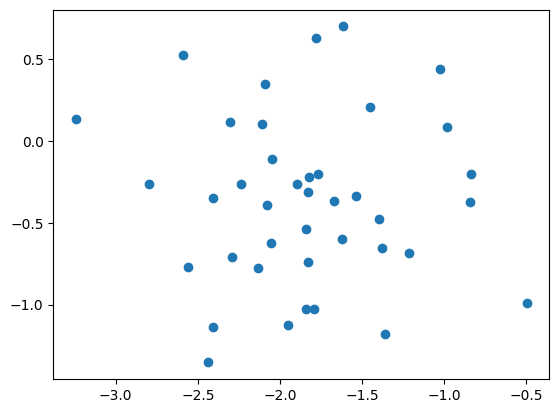

In [61]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=500, verbose=3, random_state=1)
bggs_embedding = tsne.fit_transform(algo.qi)
projection = pd.DataFrame(columns=['x', 'y'], data=bggs_embedding)

import matplotlib.pyplot as plt
plt.scatter(projection['x'], projection['y'])
plt.show()

In [90]:
import requests
for num in df['itemID'].unique():
    r = requests.get(f"https://www.boardgamegeek.com/xmlapi/boardgame/{num}?stats=1")
    with open(f"statsxml/{num}.xml", "wb") as f:
        f.write(r.content)

In [108]:
# https://towardsdatascience.com/web-scraping-boardgamegeek-com-using-selenium-beautifulsoup-requests-lxml-and-scrapy-1902d478ecde
from lxml import etree
import glob

def parseXML(xmlfile):
    tree = etree.parse(xmlfile)  
    root = tree.getroot()
    bg = root.find('boardgame')
    gameID = bg.get('objectid')
    
    #features have single value
    year = bg.find('yearpublished').text
    minplayers = bg.find('minplayers').text
    maxplayers = bg.find('maxplayers').text
    
    #stats
    numvoters = bg.xpath('//usersrated')[0].text
    averating = bg.xpath('//average')[0].text
    
    #features have multiple values
    publishers = [publisher.text for publisher in bg.findall("boardgamepublisher")]
    honors = [honor.text for honor in bg.findall("boardgamehonor")]
    name = [name.text for name in bg.findall("name")]
    
    #language dependency poll
    lantotal = 0
    for result in bg.xpath('//results/*[@level]'):
        lantotal += int(result.get('level')) * int(result.get('numvotes'))
    lantotalvotes = int(bg.xpath('//poll[contains(@name,"lan")]')[0].get('totalvotes'))
    if lantotalvotes > 0:
        lan_depen = round(lantotal/lantotalvotes,1)
    else: 
        lan_depen = 'unknown'
        
    data = {"game_id": gameID, 'name':name[0], 'year':year, 'minplayers':minplayers, 'maxplayers':maxplayers}
    return data

In [111]:
filelist = glob.glob("statsxml/*.xml")

all_bgs = [parseXML(bg) for bg in filelist]
game_ids = list(map(lambda x: x['game_id'], all_bgs))
name = list(map(lambda x: x['name'], all_bgs))
year = list(map(lambda x: x['year'], all_bgs))
minplayers = list(map(lambda x: x['minplayers'], all_bgs))
maxplayers = list(map(lambda x: x['maxplayers'], all_bgs))

bgg_api_data = pd.DataFrame({
    "game_id": game_ids,
    "name": name,
    "year": year,
    "minplayers": minplayers,
    "maxplayers": maxplayers
})
bgg_api_data

,game_id,name,year,minplayers,maxplayers
0,102794,Caverna,2013,1,7
1,115746,Guerra del Anillo: Segunda Edición,2011,2,4
2,120677,Terra Mystica,2012,2,5
3,12333,Gleichgewicht des Schreckens,2005,2,2
4,124361,Concordia,2013,2,5
5,126163,Tzolk'in: Calendarul Maiaș,2012,2,4
6,161936,Pandemic Legacy: Saison 1,2015,2,4
7,162886,Duchové ostrova,2017,1,4
8,164153,Star Wars: Assalto Imperiale,2014,1,5
9,164928,Orlean,2014,2,4


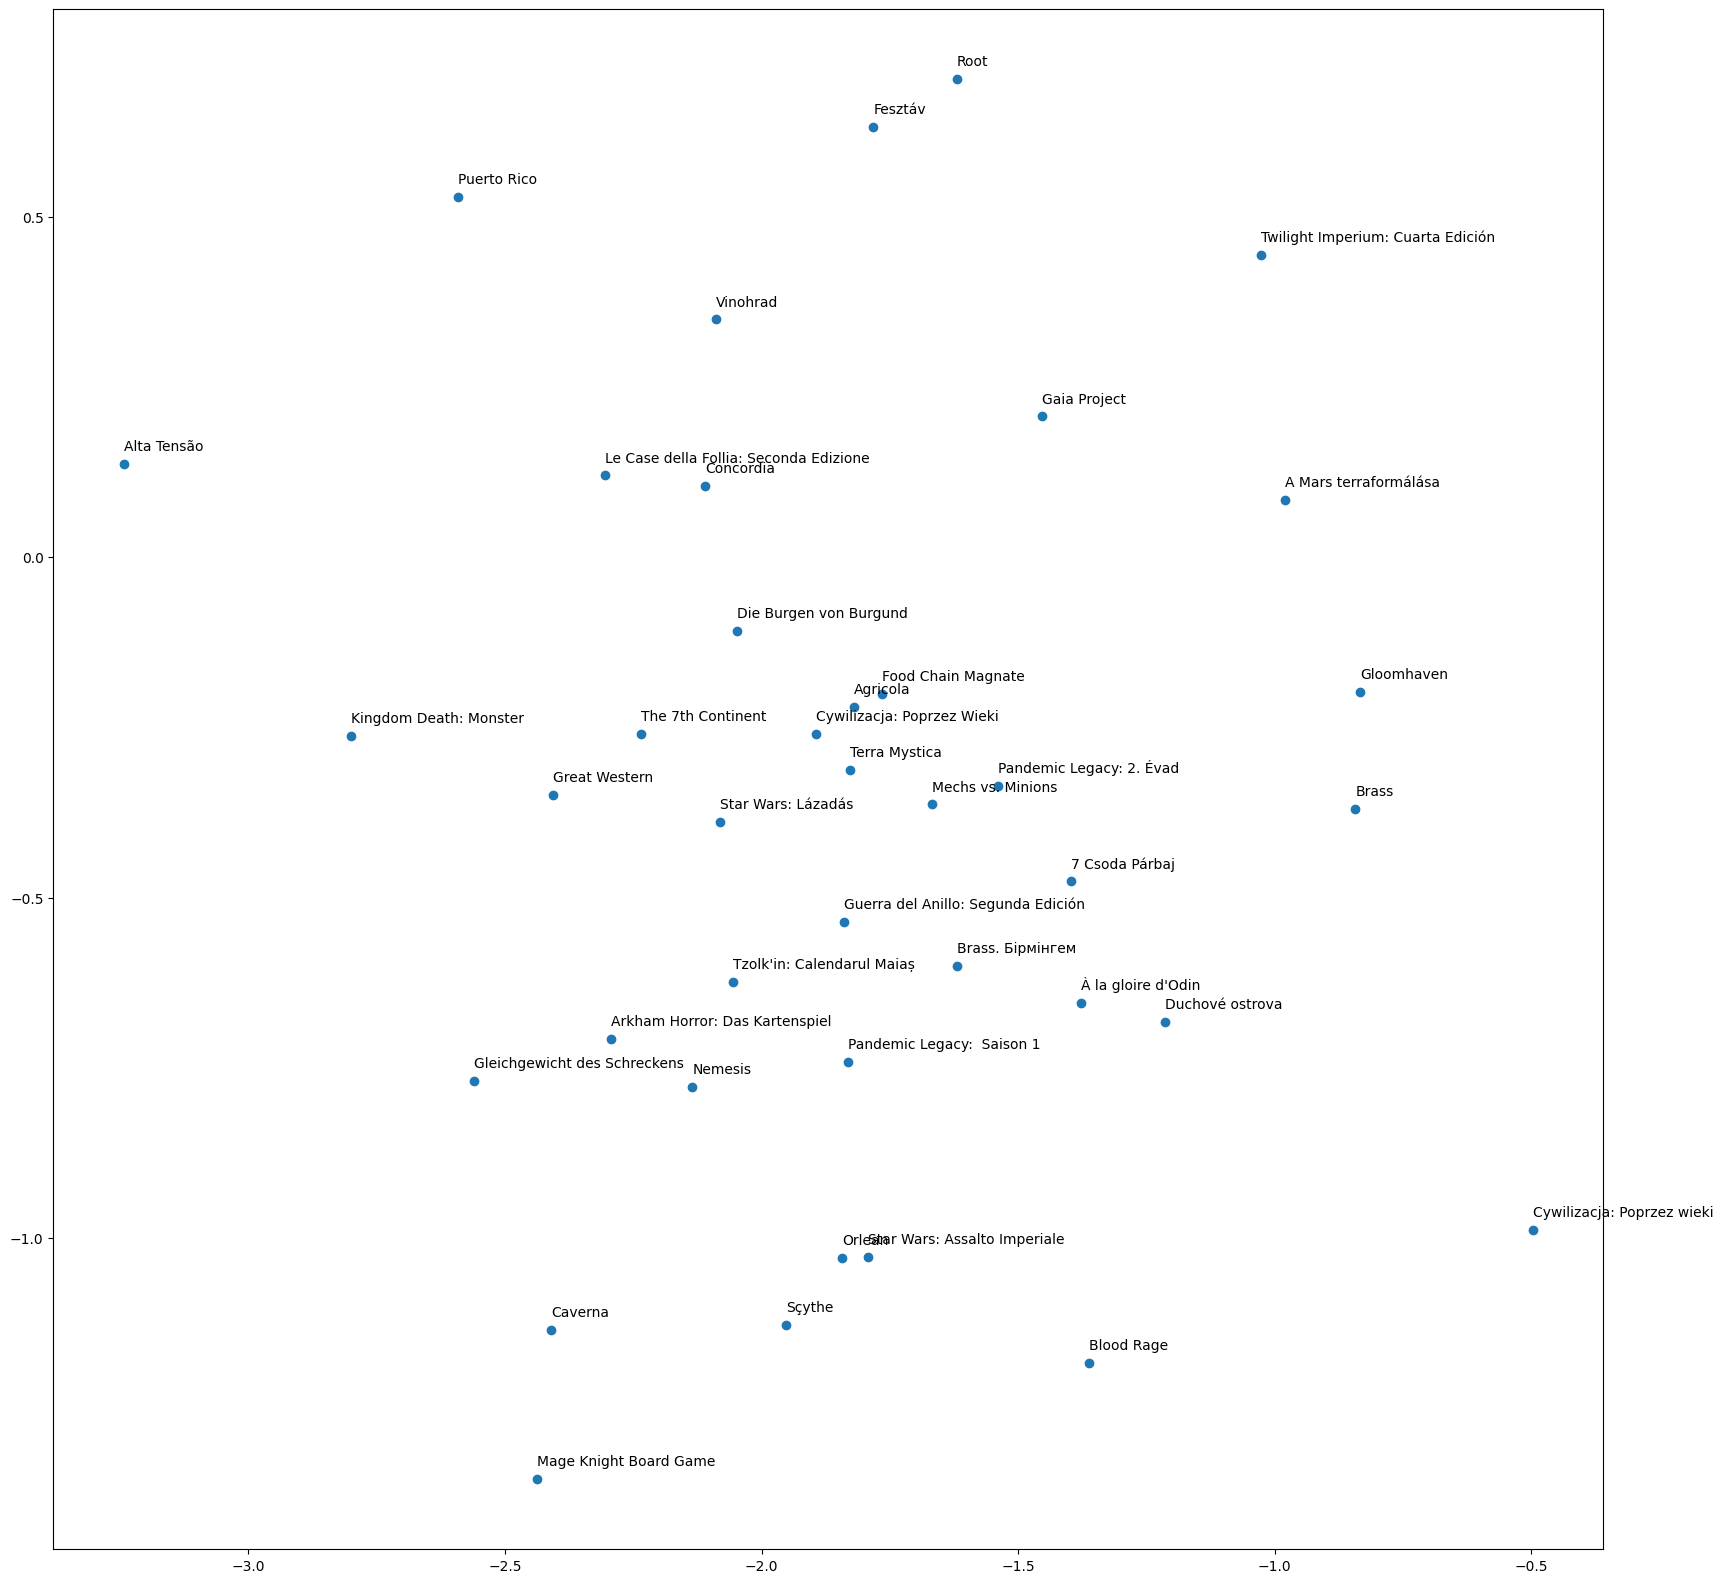

In [119]:
texts = bgg_api_data['name']
x=projection['x']
y=projection['y']

# plotting scatter plot
plt.figure(figsize=(20,20))
plt.scatter(x, y)
for i in range(40):
    plt.annotate(texts[i], (x[i], y[i] + 0.02))
plt.show()